<a href="https://colab.research.google.com/github/cogilv25/21010093uhi_DataAnalytics/blob/main/1%20-%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection
## Crime
### Check for duplicate records
The following query was run to check for reports made with the same case number:
```
SELECT * FROM `bigquery-public-data.chicago_crime.crime`
WHERE `case_number` IN
  (
    SELECT `case_number` FROM `bigquery-public-data.chicago_crime.crime`
    GROUP BY `case_number` HAVING COUNT(*) > 1
  )
ORDER BY `case_number` ASC;
```
This returned 50 records all of which were homicide cases and it was noted that where multiple records shared a case_number there were no relevant differences. Further research uncovered that the database has a record for each victim in the case of homicides and as these are single incidents only a single record needs to be kept for the purpose of predicting incidents.

### Construct query
The query to count the number of crimes reported for each date excluding any dates after 2024 as an incomplete year will skew the statistics for months in that year  that have data.
```
SELECT CAST(`date` as DATE) as `date`, COUNT(DISTINCT(`case_number`)) as `reports`
FROM `bigquery-public-data.chicago_crime.crime` WHERE `date` < "2025-01-01"
GROUP BY `date`
```

## Weather
### Find a suitable weather station
Google Maps was used in order to find a reasonable set of bounds for central Chicago which could then be used to query National Oceanic and Atmospheric Administration's Global Surface Summary of the Day Database (NOAA GSOD) using BigQuery for a suitable weather station to use. The chosen bounds were between 41.64436 and 42.01836 latitude and between -87.84245 and -87.52453 longitude.

We can then run the following query using BigQuery:
```
SELECT * FROM `bigquery-public-data.noaa_gsod.stations` WHERE
lat > 41.64436 AND lat < 42.01836 AND lon > -87.84245 AND lon < -87.52453
ORDER BY `begin` ASC;
```
Ordering by end to get the weather stations with the most up to date data then begin to get the longest running stations since we need data from 2001 to 2025. From the list returned the data coverage is checked and it is found that Chicago Midway Airport with station number 725340 has 100% data coverage going back to 1997 so this source is chosen.

### Construct query
The query to collect the weather data needed from each database for each year and combine it together is created (a "date" column is created for easy joining with the crime data):
```
SELECT DATE(CAST(year as INT64),CAST(mo as INT64),CAST(da as INT64)) as `date`, `da` AS `dayOfMonth`, `mo` as `month`, `year`, `temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp` FROM
(
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp` FROM `bigquery-public-data.noaa_gsod.gsod2001` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp` FROM `bigquery-public-data.noaa_gsod.gsod2002` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2003` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2004` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2005` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2006` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2007` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2008` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2009` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2010` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2011` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2021` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2022` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2023` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2024` WHERE `stn`="725340"
  UNION ALL
  SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2025` WHERE `stn`="725340"
)
```
## Collate data
The 2 queries need to be joined together by using the date field which will give the full dataset that can be further processed and used in prediction models. Additionally a day field is generated which represents the day of the week as it is possible that this could be a useful metric for prediction. We could create a view for each data set then query those views to collate the data but since the query is still quite small it's easier to do it in a single query where if anything needs changed we don't need to modify multiple files.
```
# Crime Data
SELECT `crime`.`date`, EXTRACT(DAYOFWEEK FROM `crime`.`date`) AS `dayOfWeek`, `dayOfMonth`, `month`, `year`, `reports`, `temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp` FROM
(
  SELECT CAST(`date` as DATE) as `date`, COUNT(DISTINCT(`case_number`)) as `reports`
  FROM `bigquery-public-data.chicago_crime.crime`  WHERE `date` < "2025-01-01"
  GROUP BY `date`
) AS `crime`

# Left join to remove any weather records we don't have crime records for.
LEFT JOIN

# Weather Data
(
  SELECT DATE(CAST(year as INT64),CAST(mo as INT64),CAST(da as INT64)) as `date`, `da` AS `dayOfMonth`, `mo` as `month`, `year`, `temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp` FROM
  (
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp` FROM `bigquery-public-data.noaa_gsod.gsod2001` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp` FROM `bigquery-public-data.noaa_gsod.gsod2002` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2003` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2004` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2005` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2006` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2007` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2008` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2009` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2010` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2011` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2021` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2022` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2023` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2024` WHERE `stn`="725340"
    UNION ALL
    SELECT `da`, `mo`, `year`,`temp`, `dewp`, `slp`, `stp`, `visib`, `wdsp`, `mxpsd`, `gust`, `max`, `min`, `prcp`, `sndp`  FROM `bigquery-public-data.noaa_gsod.gsod2025` WHERE `stn`="725340"
  )
) AS `weather`


ON `weather`.`date`=`crime`.`date` ORDER BY `crime`.`date`
```

A copy of the data produced by this query is stored in a GitHub repository and the collated data is then imported into Google Colab for analysis. Additionally the date field is converted from a character array into a date type otherwise R does not know what it is and it cannot easily be manipulated as is desired for analysis.

In [1]:
dat <- read.csv("https://raw.githubusercontent.com/cogilv25/21010093uhi_DataAnalytics/refs/heads/main/1_collated_datset.csv")
dat$date <- as.Date(dat$date, format="%Y-%m-%d") # Convert date characters to date type

# Analysis

In [2]:
summary(dat)

      date              dayOfWeek   dayOfMonth        month       
 Min.   :2001-01-01   Min.   :1   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:2007-01-01   1st Qu.:2   1st Qu.: 8.00   1st Qu.: 4.000  
 Median :2012-12-31   Median :4   Median :16.00   Median : 7.000  
 Mean   :2012-12-31   Mean   :4   Mean   :15.73   Mean   : 6.523  
 3rd Qu.:2018-12-31   3rd Qu.:6   3rd Qu.:23.00   3rd Qu.:10.000  
 Max.   :2024-12-31   Max.   :7   Max.   :31.00   Max.   :12.000  
      year         reports            temp             dewp       
 Min.   :2001   Min.   : 320.0   Min.   :-13.50   Min.   :-24.60  
 1st Qu.:2007   1st Qu.: 711.0   1st Qu.: 36.90   1st Qu.: 26.60  
 Median :2012   Median : 868.0   Median : 53.30   Median : 40.50  
 Mean   :2013   Mean   : 939.7   Mean   : 52.64   Mean   : 40.16  
 3rd Qu.:2019   3rd Qu.:1185.0   3rd Qu.: 70.50   3rd Qu.: 55.80  
 Max.   :2024   Max.   :2035.0   Max.   : 92.70   Max.   : 77.90  
      slp               stp              visib             wds

## Data Description
- date - The date with the display format 'YYYY-MM-DD'.
- dayOfWeek - The day of the week (1-7, Sunday-Saturday).
- dayOfMonth - The Calendar day (1-28/29/30/31).
- month - The Calendar month (1-12, January-December).
- year - The Calendar year (2001-2025).
- reports - The number of reported crimes.
- temp - The average temperature in degreees Fahrenheit.
- dewp - The average dew point in degrees Fahrenheit.
- slp - The average sea level pressure in millibars.
- stp - The average station pressure in millibars.
- visib - The average visibility in miles.
- wdsp - The average wind speed in knots.
- mxpsd - The maximum sustained wind speed recorded in knots.
- gust - The maximum wind gust recorded in knots.
- max - The maximum temperature recorded in degrees Fahrenheit.
- min - The minimum temperature recorded in degrees Fahrenheit.
- prcp - The total recorded precipitation in inches.
- sndp - Snow depth in inches.

## Initial Cleaning
The descriptions of several of the attributes in the NOAA GSOD database mentions that certain values are used to indicate missing data and in some instances missing data indicates that the value should be 0. In the case of slp, stp, gust, max and prcp these values represent missing data and will be replaced with NA for now. In the case of sndp these values indicate there was 0 snow depth and thus the values will be replaced with 0.

In [3]:
dat$slp[dat$slp == 9999.9] <- NA
dat$stp[dat$stp == 9999.9] <- NA
dat$gust[dat$gust == 999.9] <- NA
dat$max[dat$max == 9999.90] <- NA
dat$prcp[dat$prcp == 99.990] <- NA

dat$sndp[dat$sndp == 999.9] <- 0

summary(dat)

      date              dayOfWeek   dayOfMonth        month       
 Min.   :2001-01-01   Min.   :1   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:2007-01-01   1st Qu.:2   1st Qu.: 8.00   1st Qu.: 4.000  
 Median :2012-12-31   Median :4   Median :16.00   Median : 7.000  
 Mean   :2012-12-31   Mean   :4   Mean   :15.73   Mean   : 6.523  
 3rd Qu.:2018-12-31   3rd Qu.:6   3rd Qu.:23.00   3rd Qu.:10.000  
 Max.   :2024-12-31   Max.   :7   Max.   :31.00   Max.   :12.000  
                                                                  
      year         reports            temp             dewp       
 Min.   :2001   Min.   : 320.0   Min.   :-13.50   Min.   :-24.60  
 1st Qu.:2007   1st Qu.: 711.0   1st Qu.: 36.90   1st Qu.: 26.60  
 Median :2012   Median : 868.0   Median : 53.30   Median : 40.50  
 Mean   :2013   Mean   : 939.7   Mean   : 52.64   Mean   : 40.16  
 3rd Qu.:2019   3rd Qu.:1185.0   3rd Qu.: 70.50   3rd Qu.: 55.80  
 Max.   :2024   Max.   :2035.0   Max.   : 92.70   Max.   : 77.

Another oddity in the data is that the station pressure is sometimes significantly below 1 bar and even sometimes 0 which is impossible in any environment that supports life. It seems that the date range where these data points occur is missing any values over 1 bar, as such it is likely an input error occured and adding 1000 millibar to these values will resolve the issue as shown.

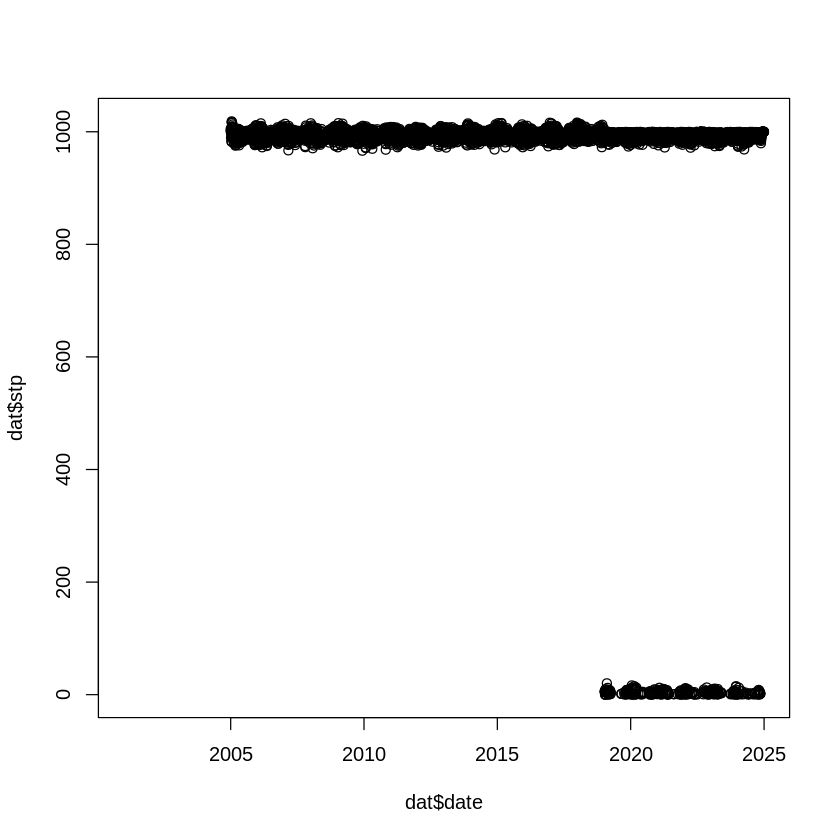

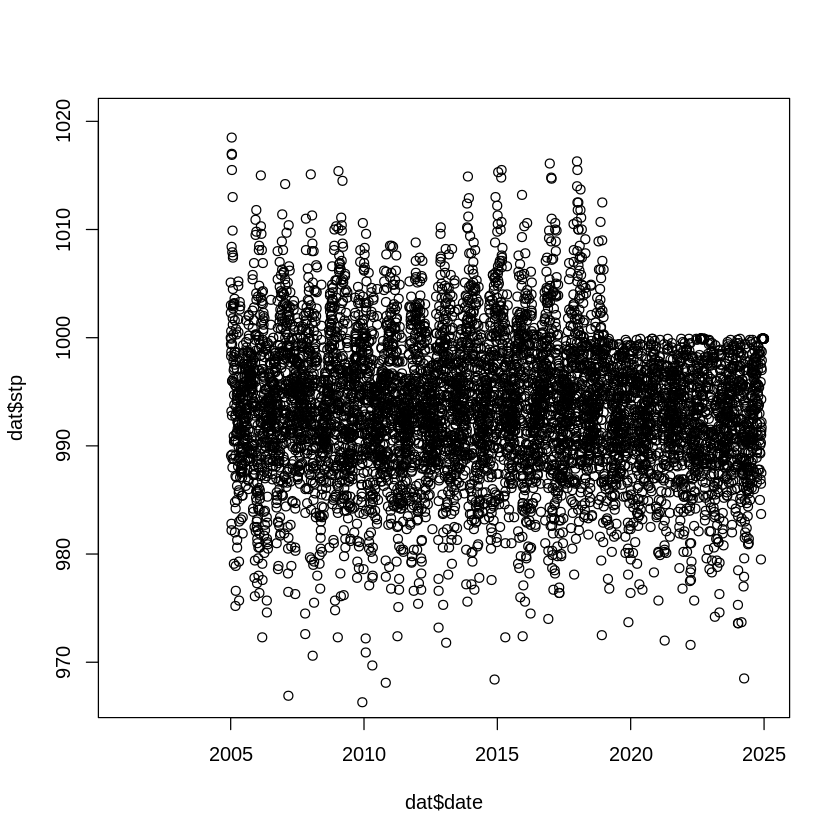

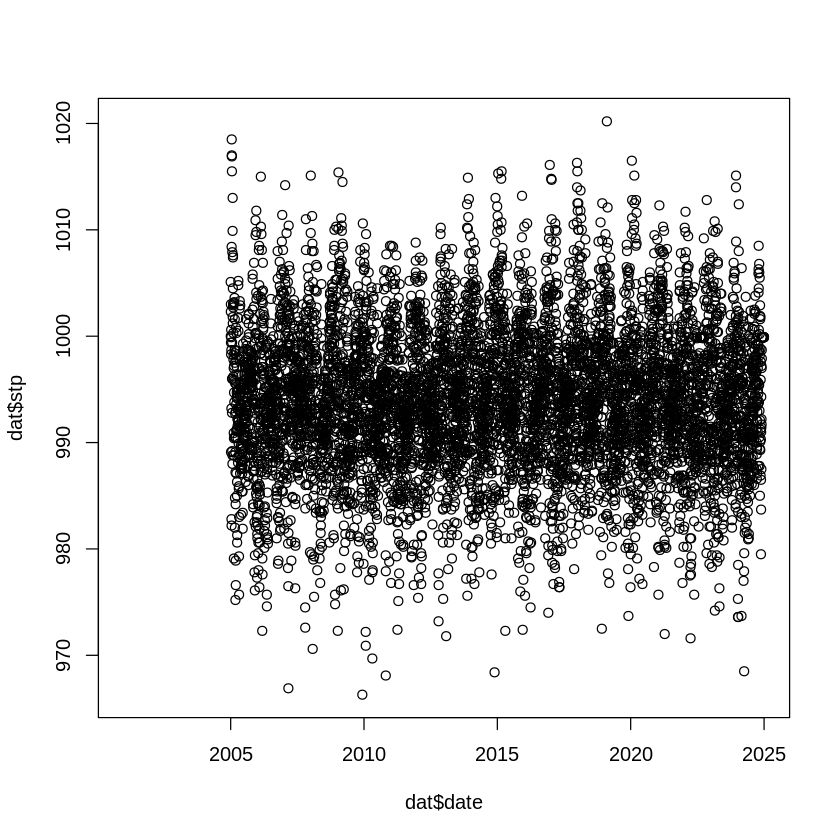

In [4]:
plot(dat$date, dat$stp)
plot(dat$date, dat$stp, ylim=c(967, 1020))
dat$stp[!is.na(dat$stp) & dat$stp < 200] <- dat$stp[!is.na(dat$stp) & dat$stp < 200] + 1000
plot(dat$date, dat$stp)

## Data Exploration
### Reports
A histogram is generated for reported crimes.

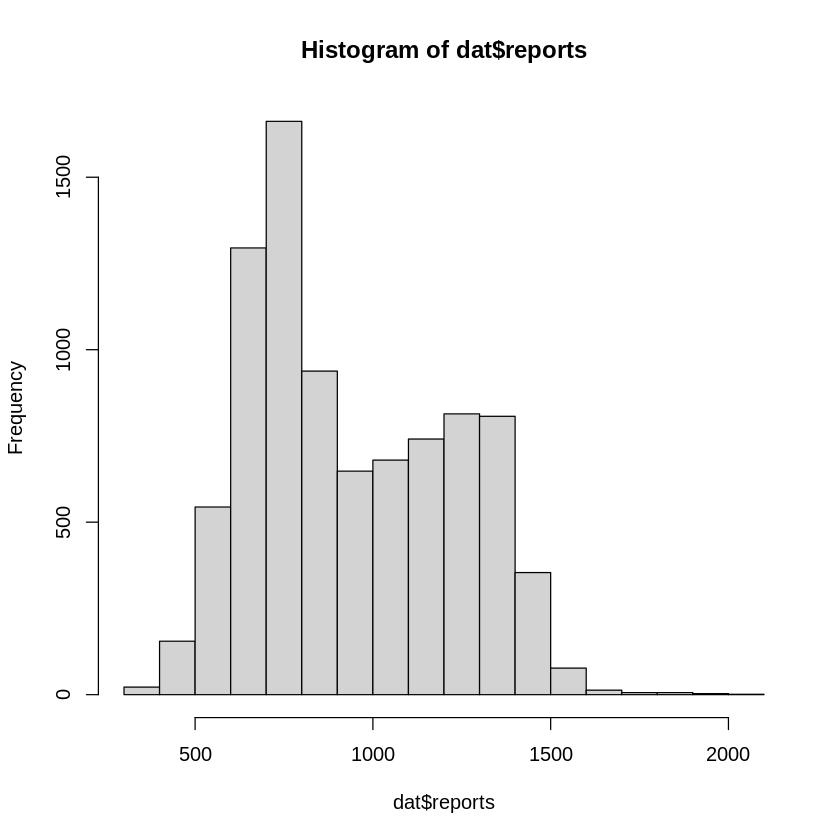

In [5]:
hist(dat$reports)

This reveals a multi modal distribution which indicates there may be more than one distinct group within the data.
### Date
Ploting date against reports there is a clear trend downards over time. Additionally:
- There appears to be a seasonal pattern to the number of reports.
- There are 2 reasonably flat gradients in the data (2001-2008 and 2015-) which may account for the 2 local peaks in the histogram.
- There is a pronounced drop around 2020-2021 which may be a result of COVID-19.

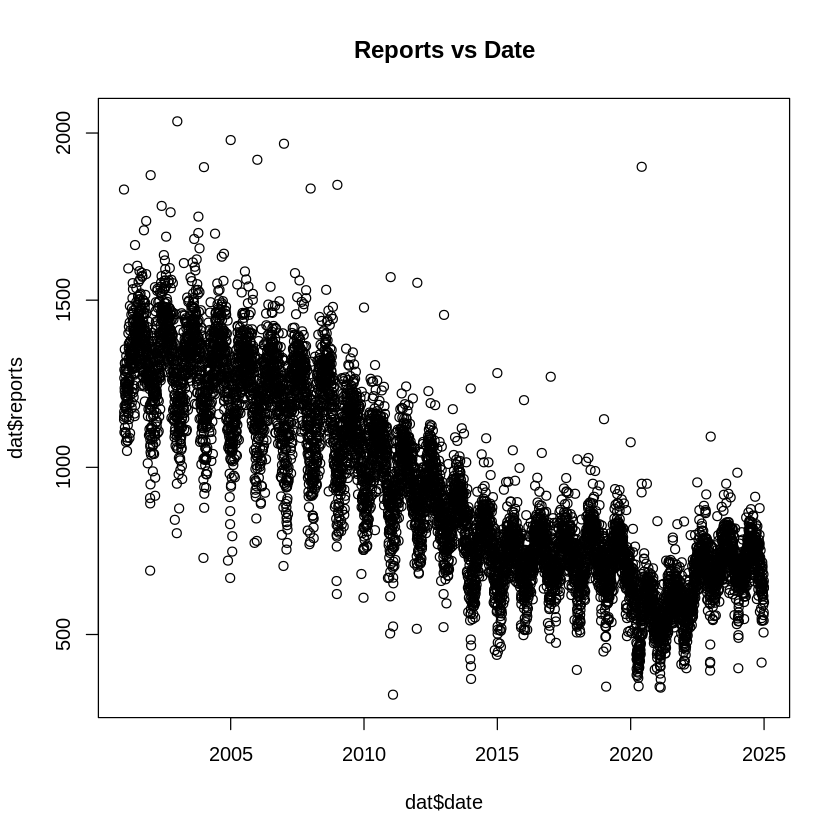

In [6]:
plot(dat$date, dat$reports, main = "Reports vs Date")

To explore more in depth what patterns may exist the reports attribute is plotted against: year, month, dayOfMonth and, dayOfWeek respectively and then a correlation coefficient is calculated for each plot.

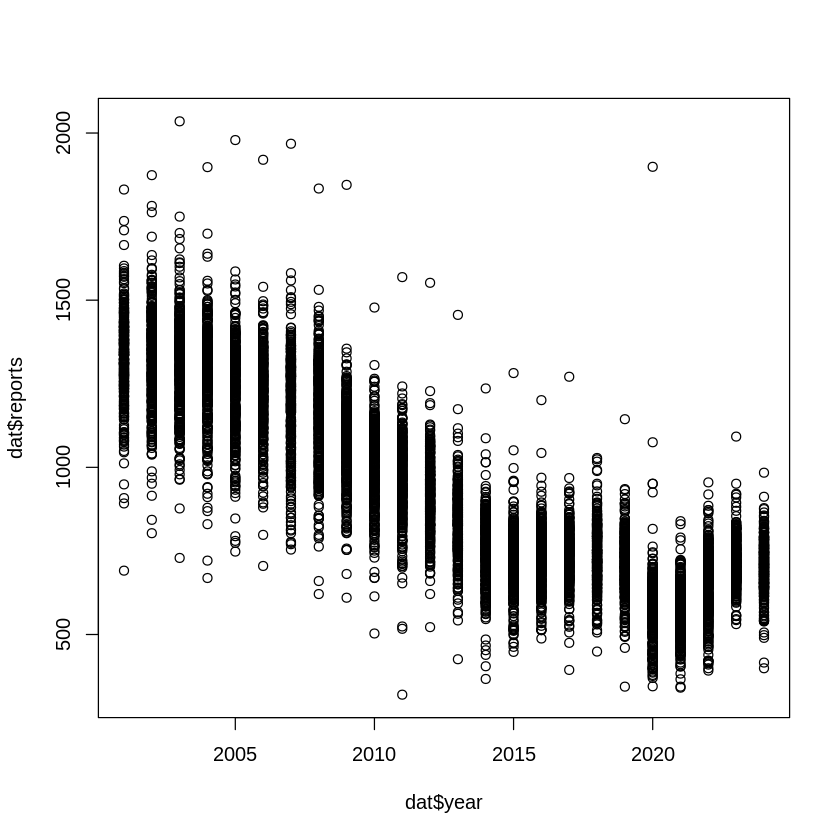

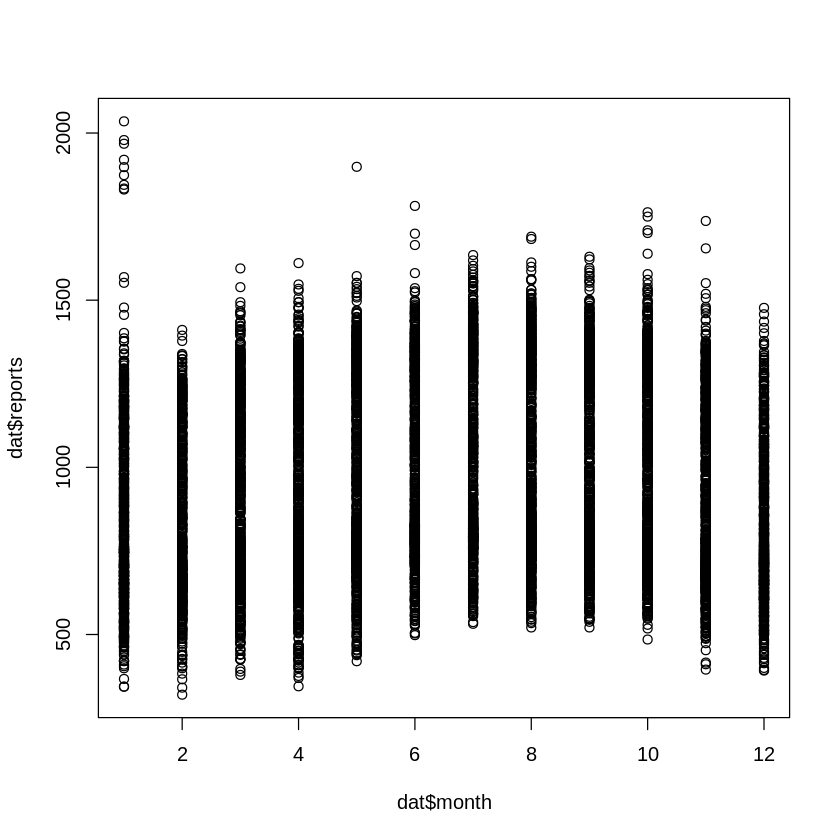

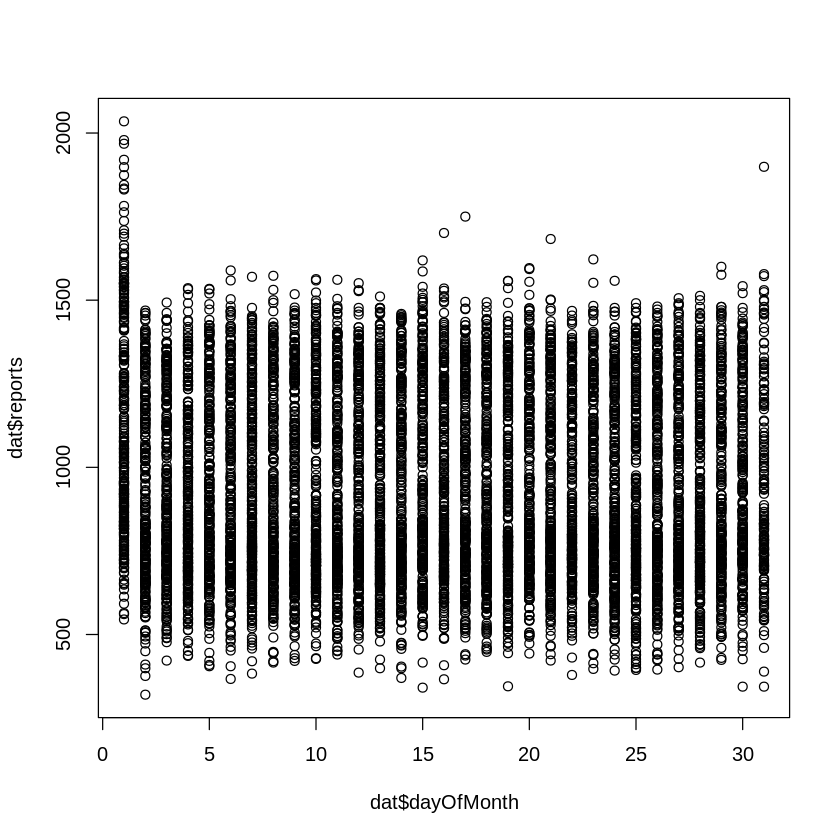

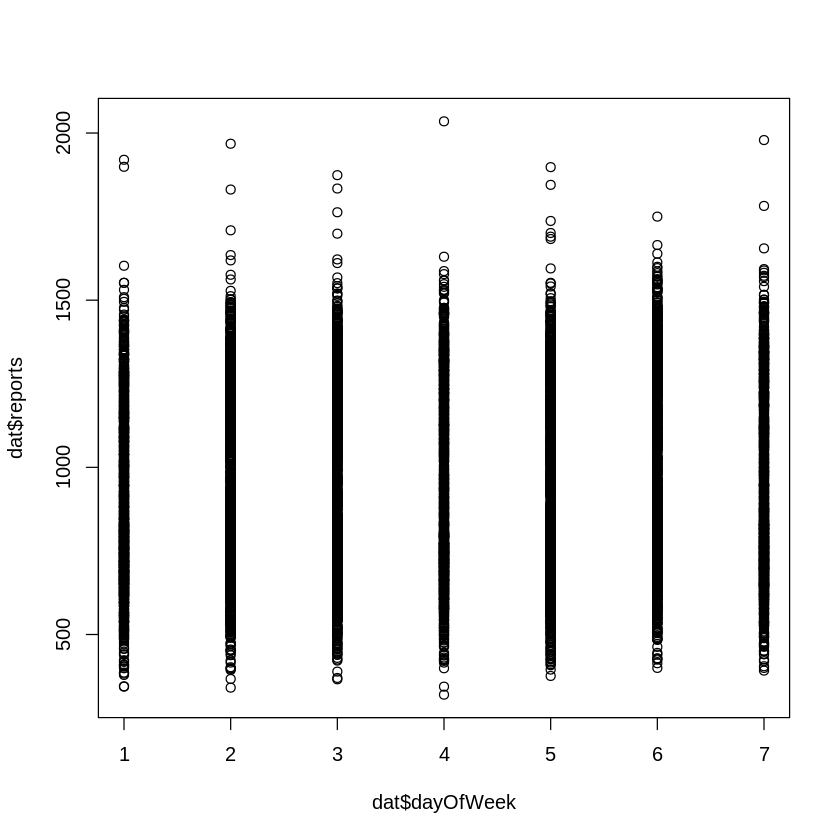

In [7]:
plot(dat$year, dat$reports)
plot(dat$month, dat$reports)
plot(dat$dayOfMonth, dat$reports)
plot(dat$dayOfWeek, dat$reports)

In [8]:
sprintf("Correlation of reports vs. year: %.5f", cor(dat$year, dat$reports))
sprintf("Correlation of reports vs. month: %.5f", cor(dat$month, dat$reports))
sprintf("Correlation of reports vs. dayOfMonth: %.5f", cor(dat$dayOfMonth, dat$reports))
sprintf("Correlation of reports vs. dayOfWeek: %.5f", cor(dat$dayOfWeek, dat$reports))

[1] "Correlation of reports vs. year: -0.87273"

[1] "Correlation of reports vs. month: 0.04863"

[1] "Correlation of reports vs. dayOfMonth: -0.04194"

[1] "Correlation of reports vs. dayOfWeek: 0.06275"

Some observations can be made based on the generated plots:
- The year strongly correlates (-0.87) with the number of reports made.
- 2020 created a significant deviation from the trend, this is suspected to be due to COVID-19.
- There appears to be a fairly clear seasonal pattern where reports generally increase during the summer months, although this is not a linear correlation which gives a very low coefficient of 0.04
- There appears to be a disproporionately high number of reports on the first day of the month, however, there is no discernible correlation otherwise between dayOfMonth and reports.
- There is a thinning of data points around 1000 reports on the dayOfMonth plot caused by the multi modal distribution of reports.
- There is negligible correlation between the day of the week and reports.

To better examine the seasonal pattern in month we can plot month against reports for individual years, producing 24 graphs.

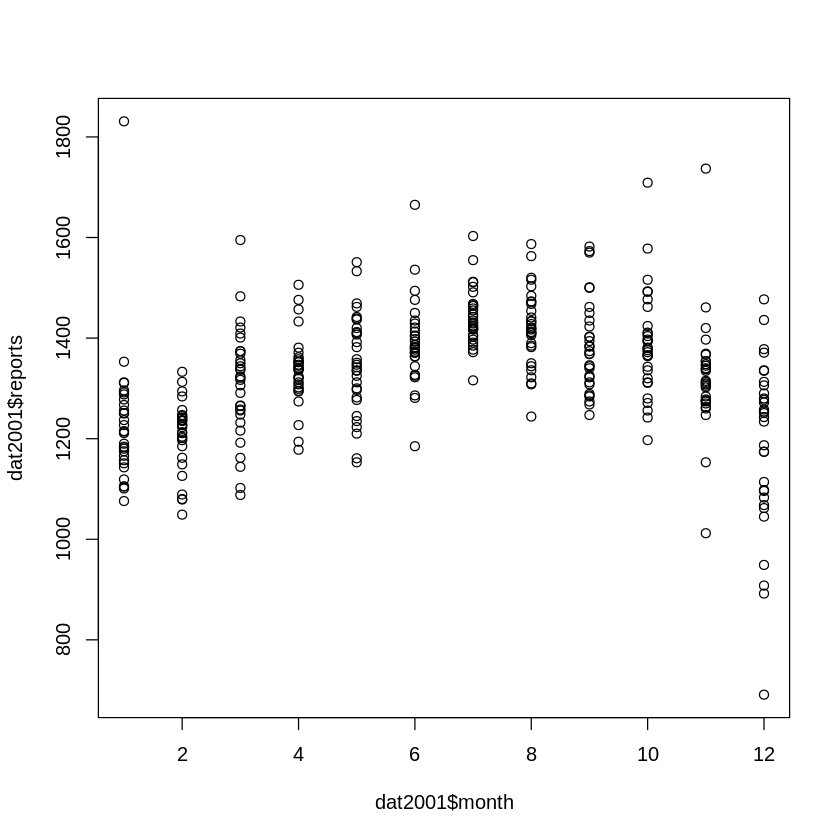

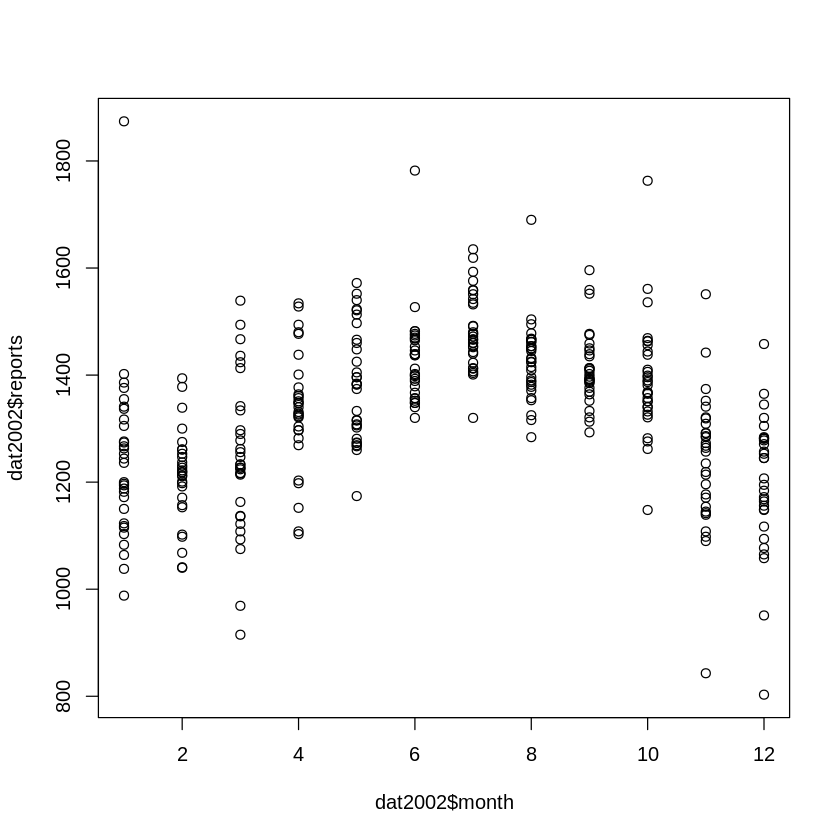

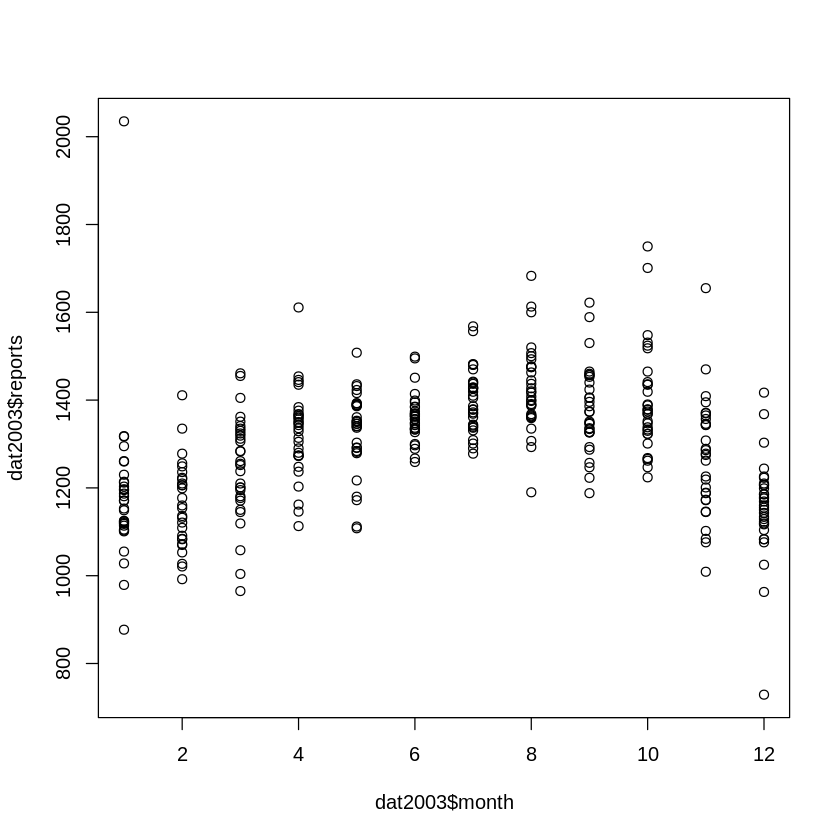

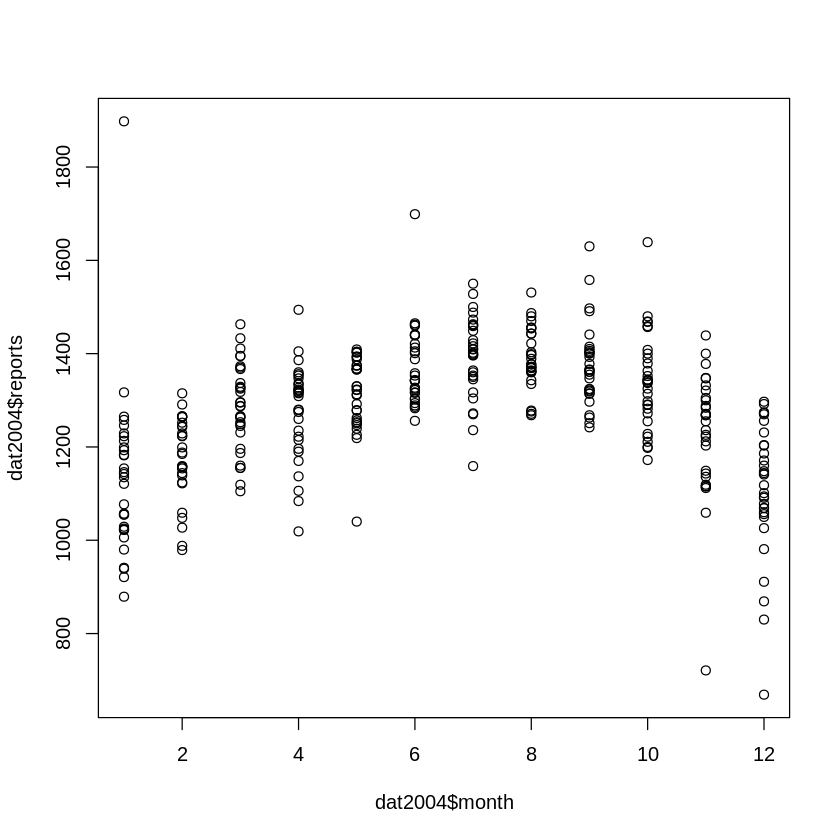

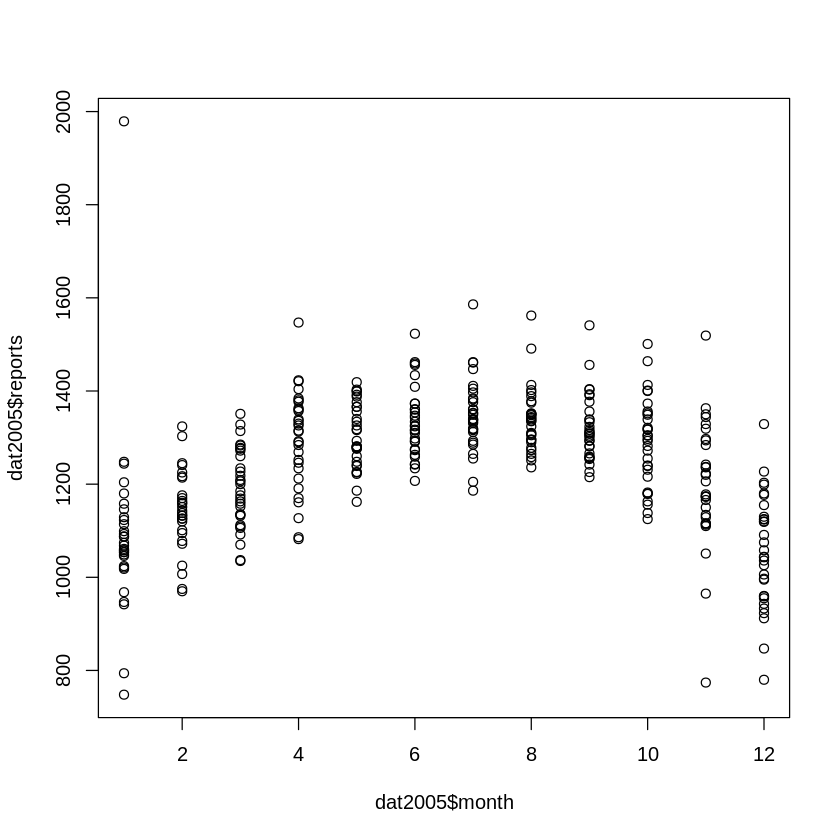

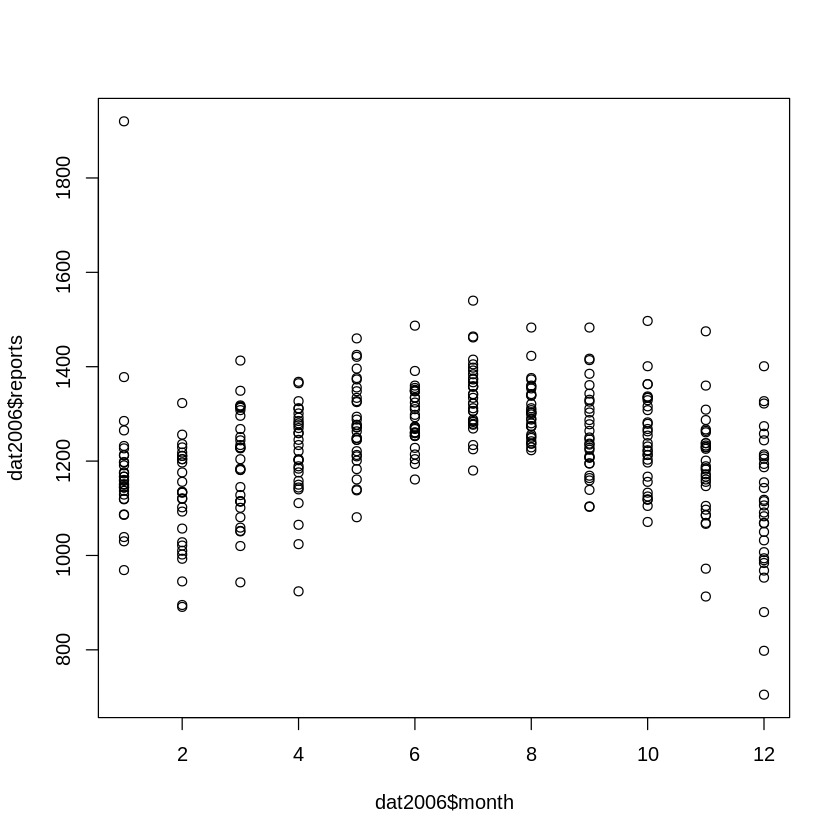

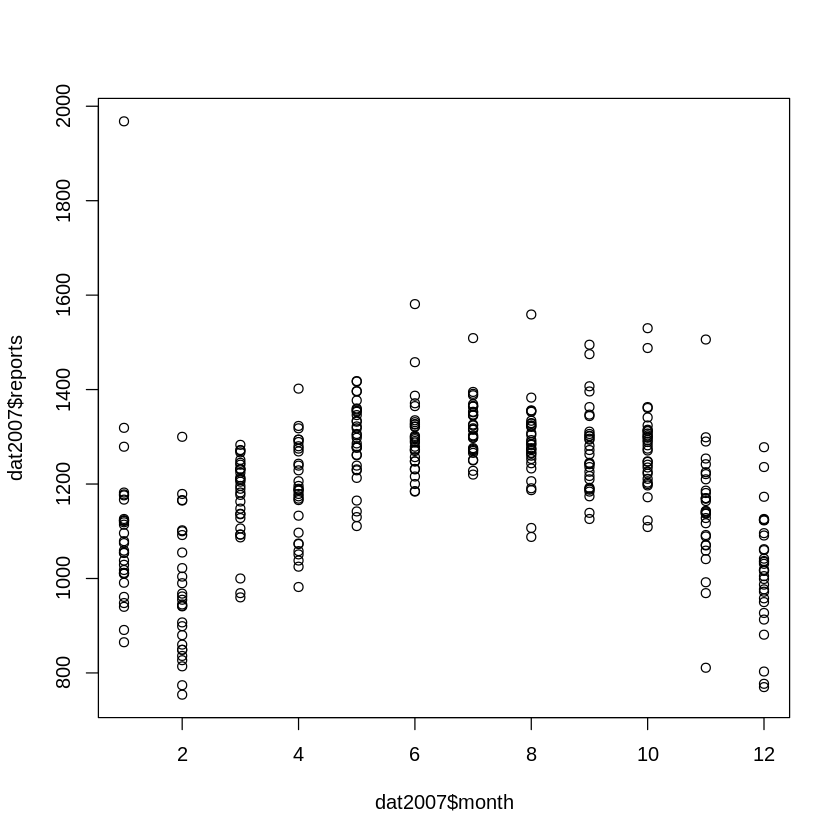

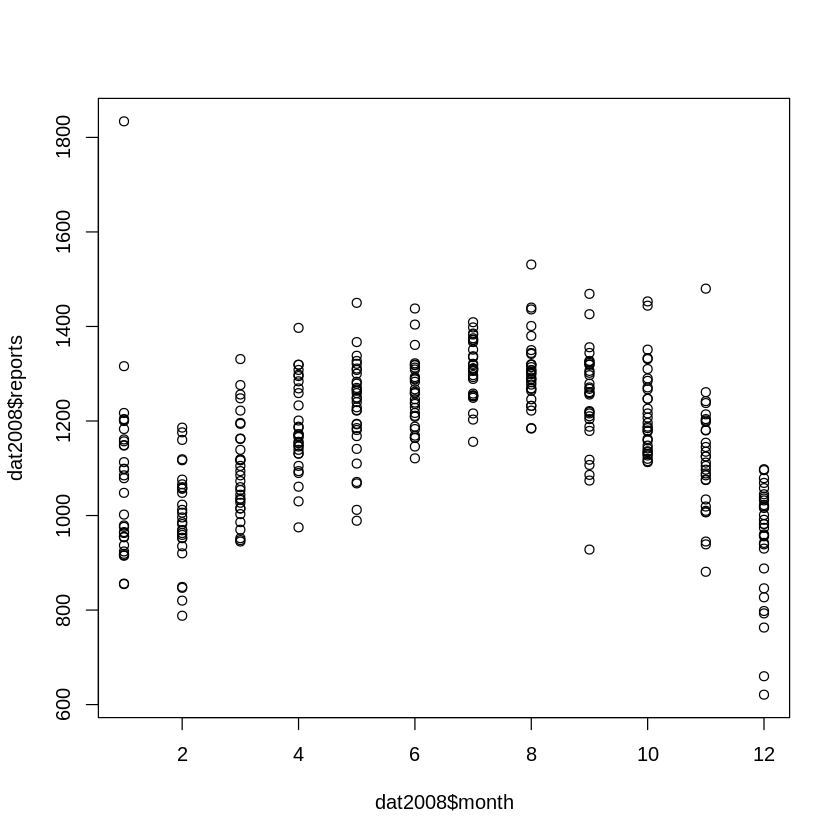

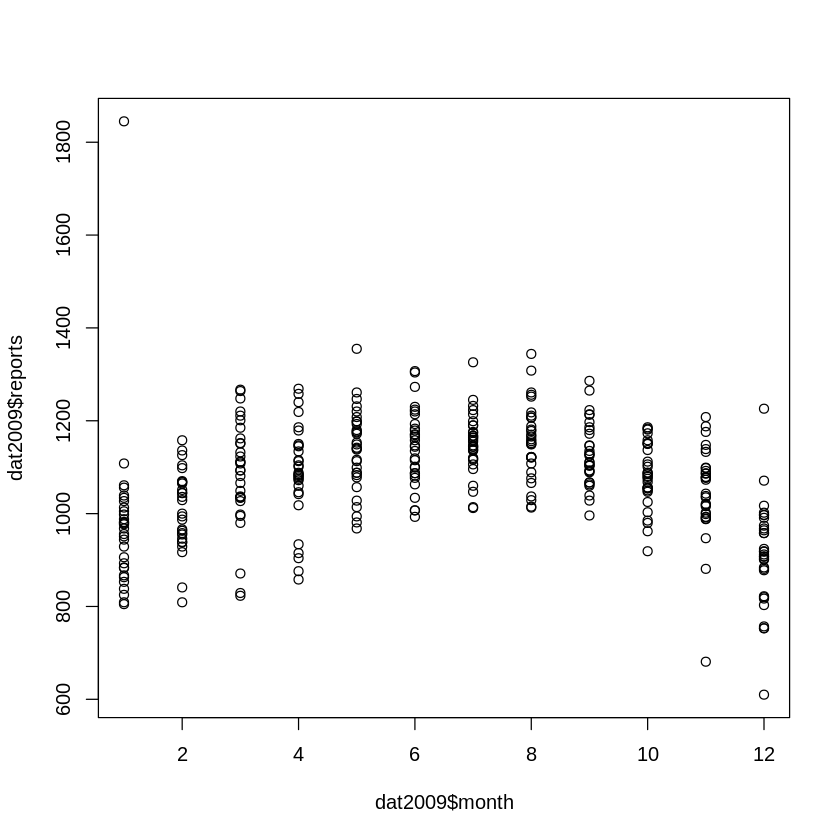

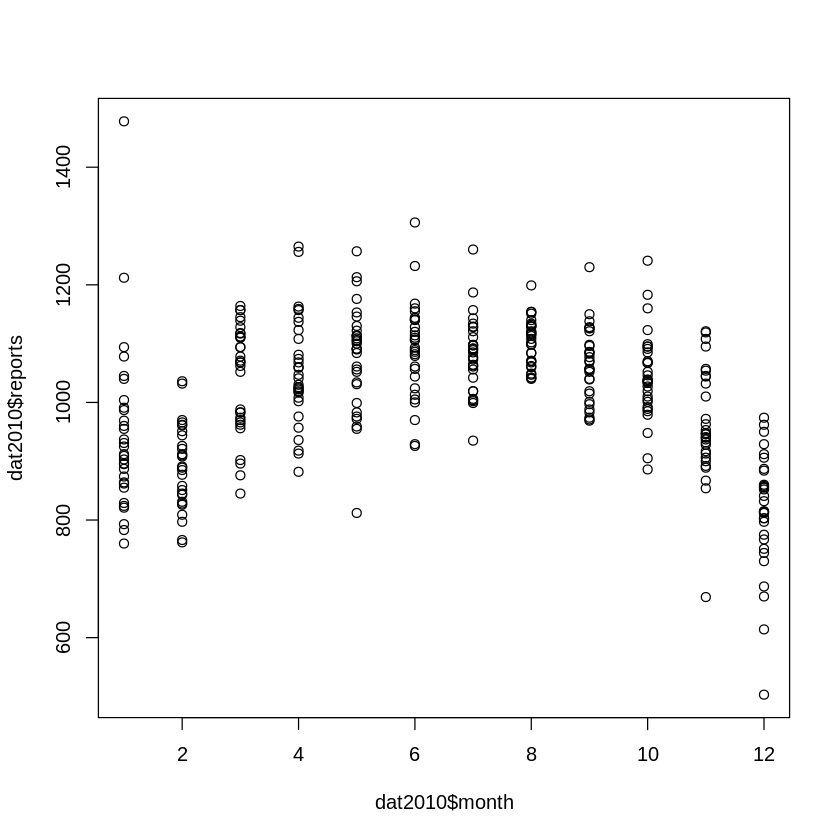

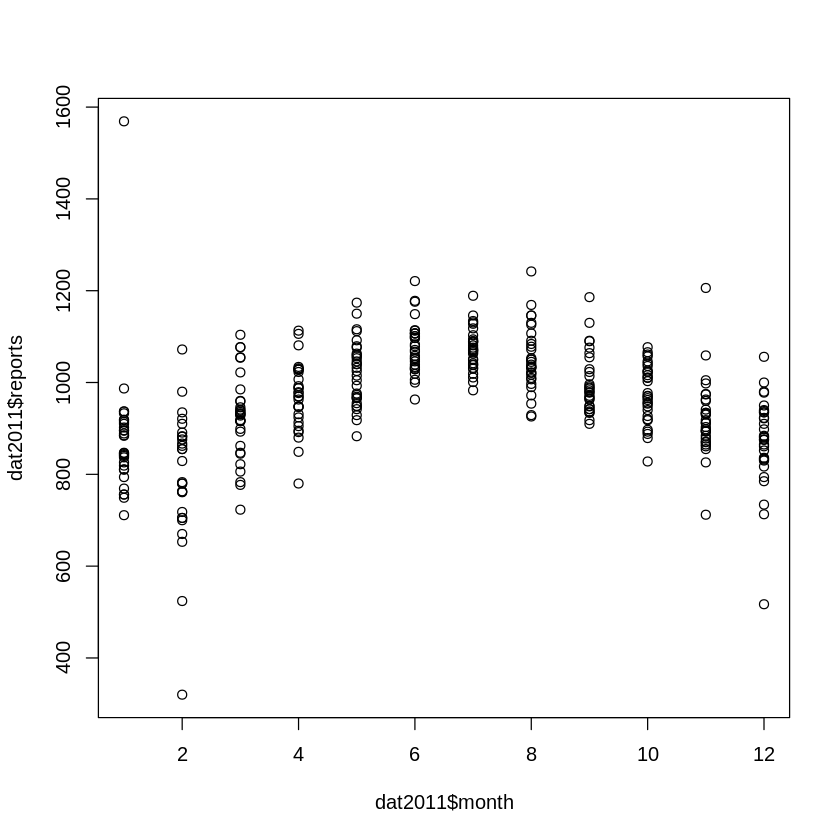

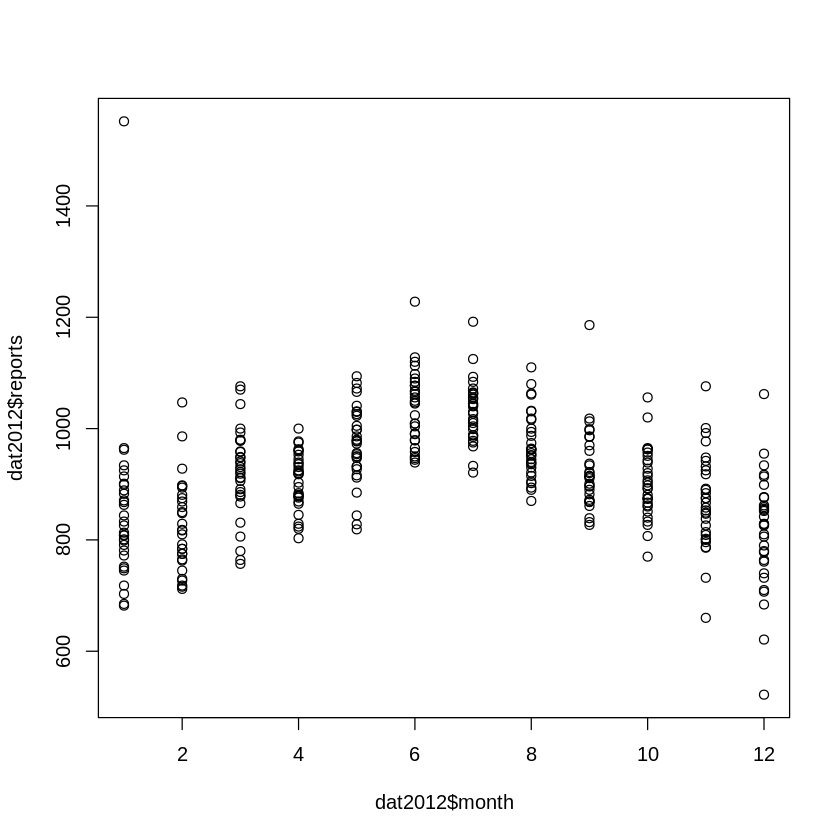

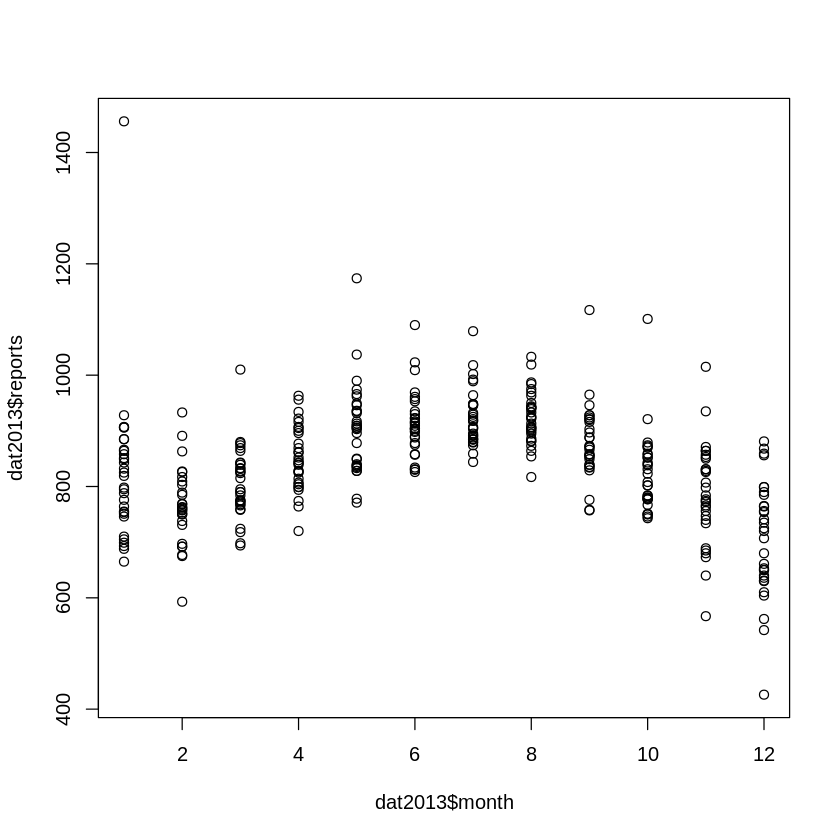

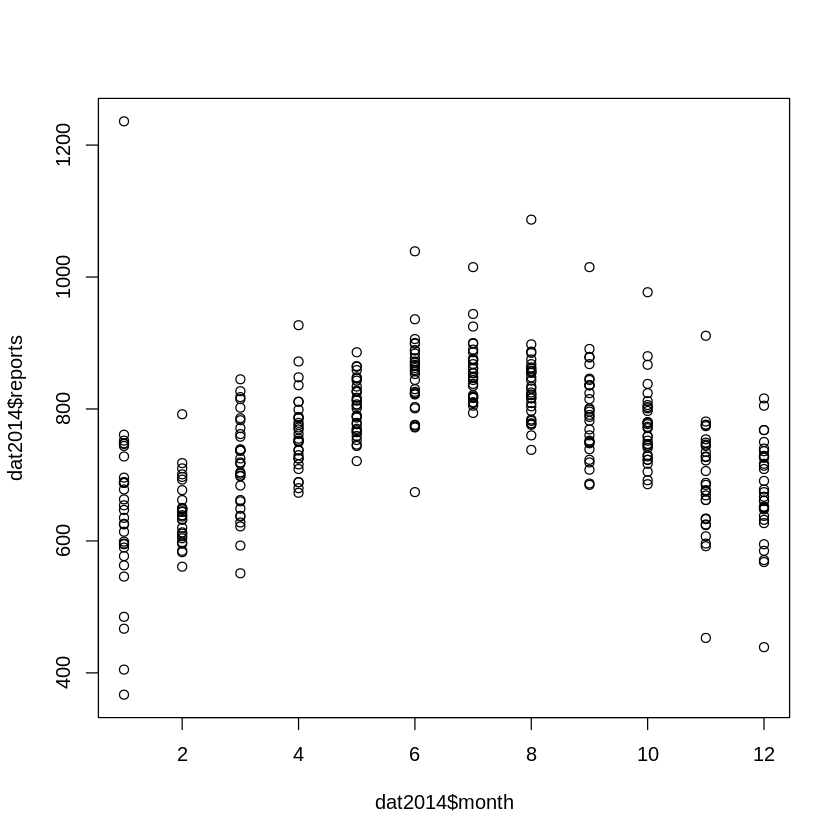

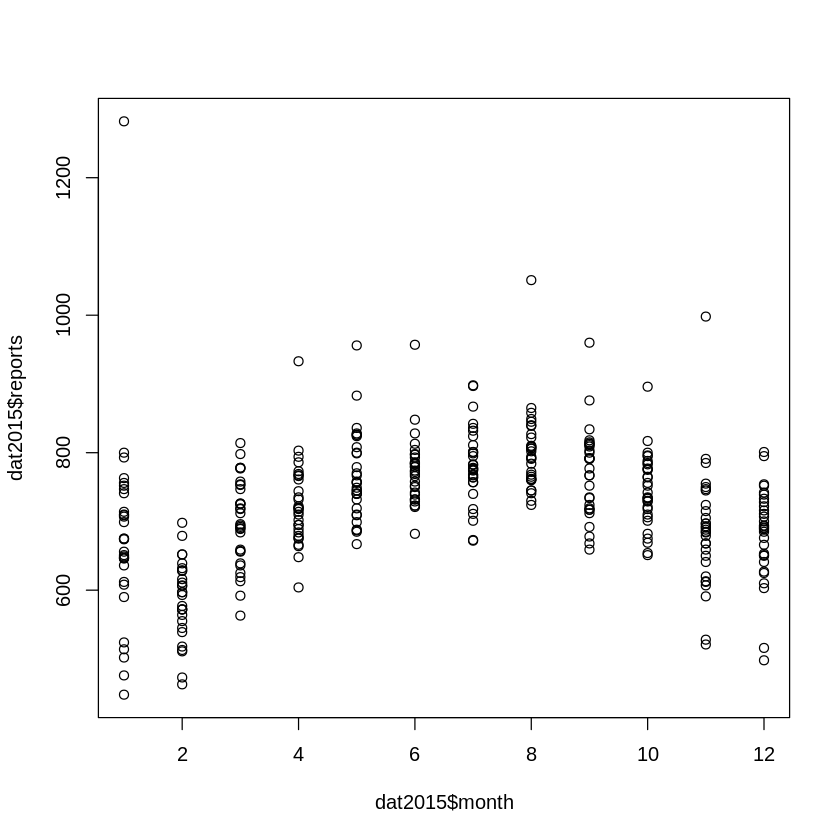

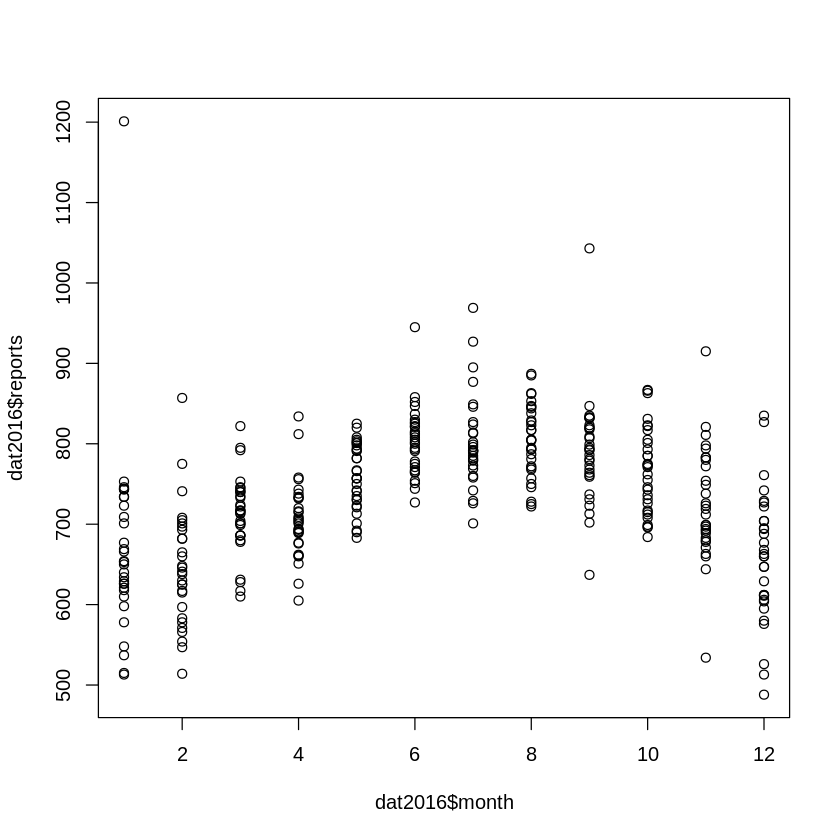

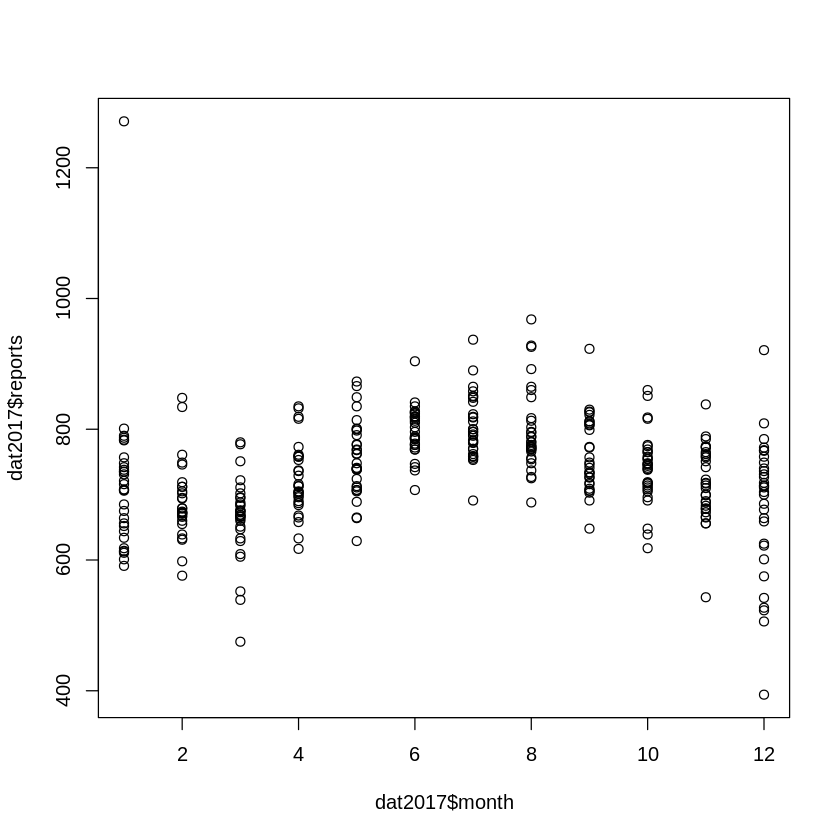

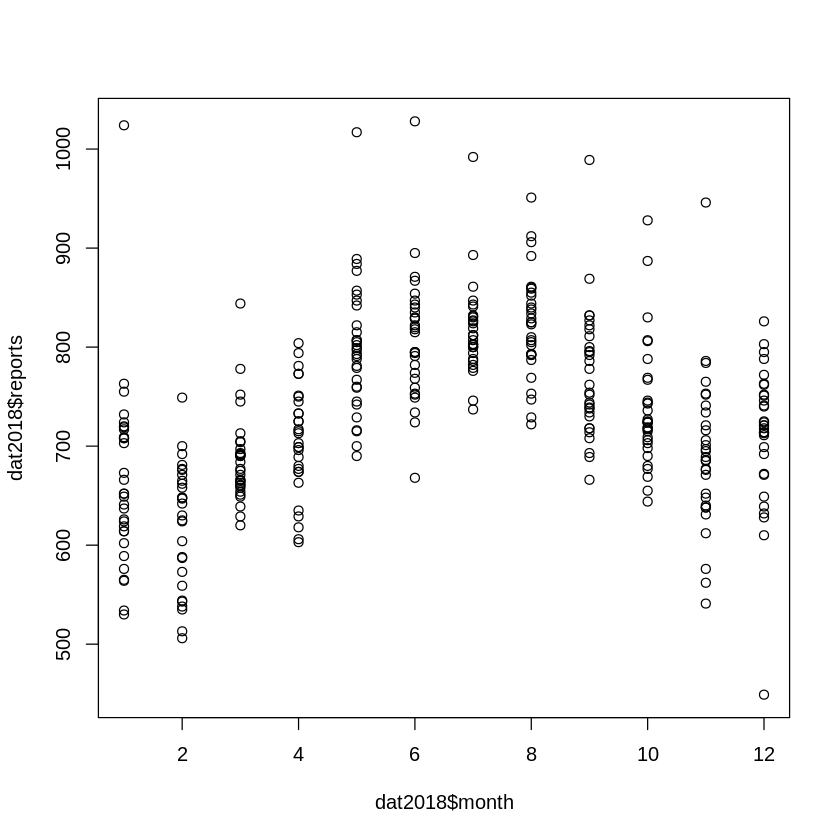

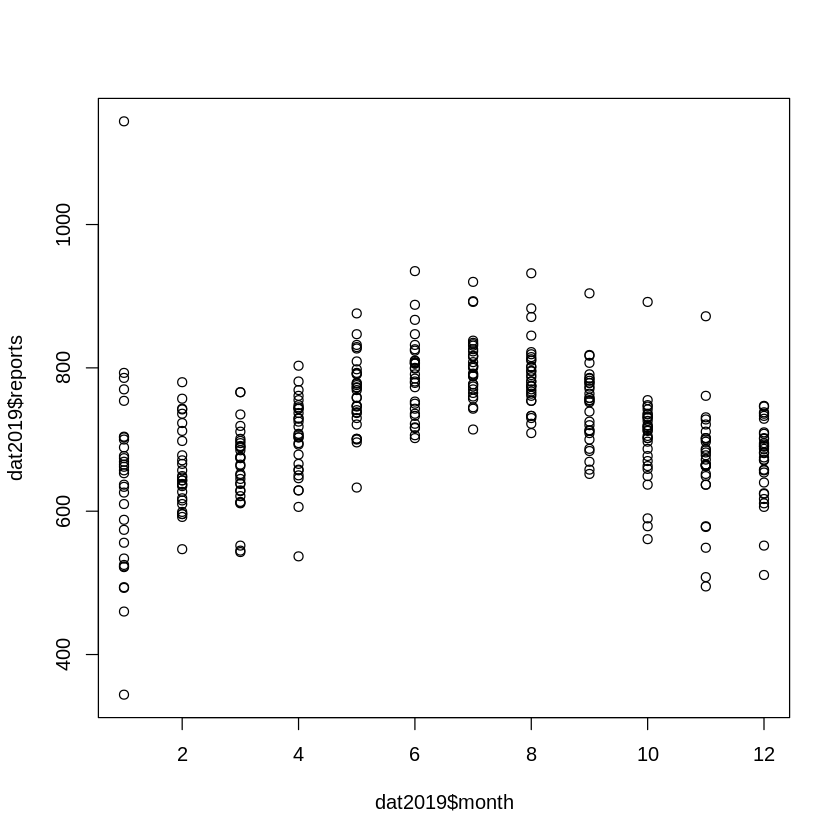

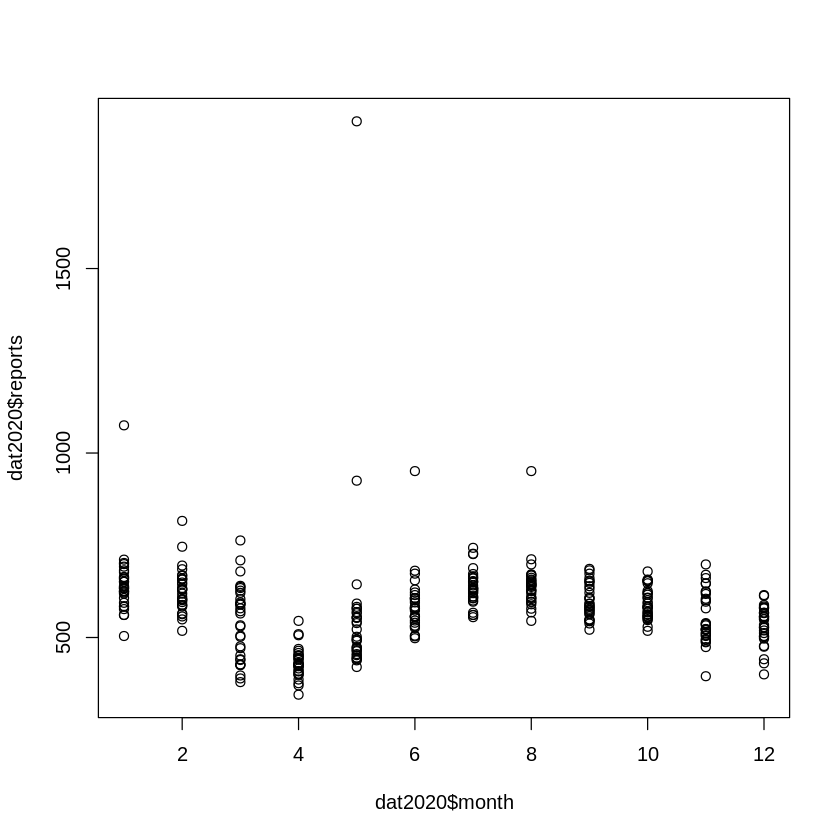

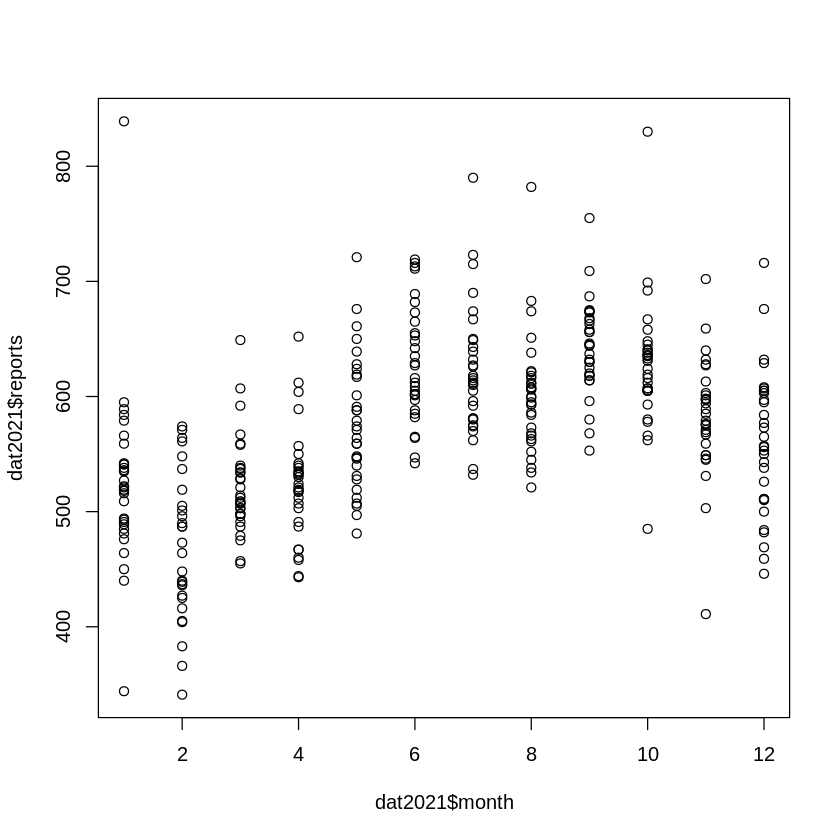

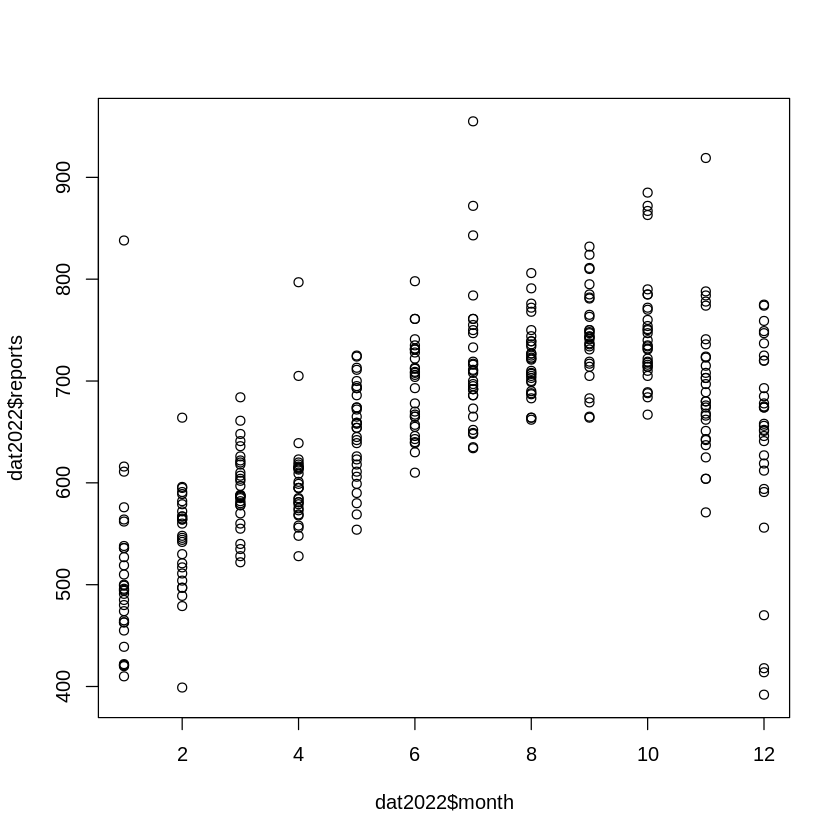

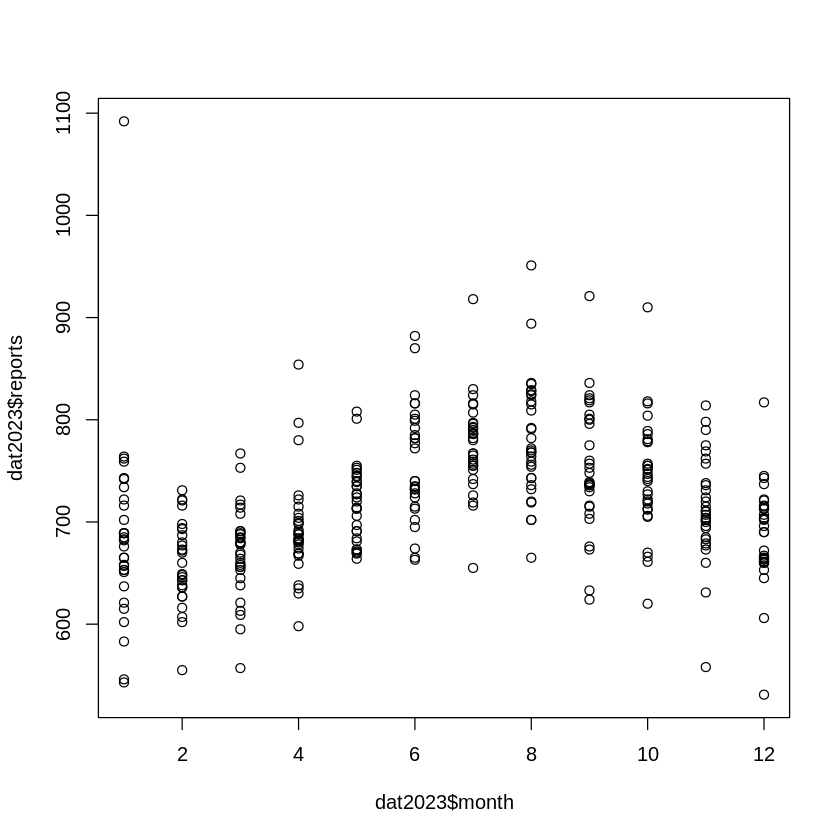

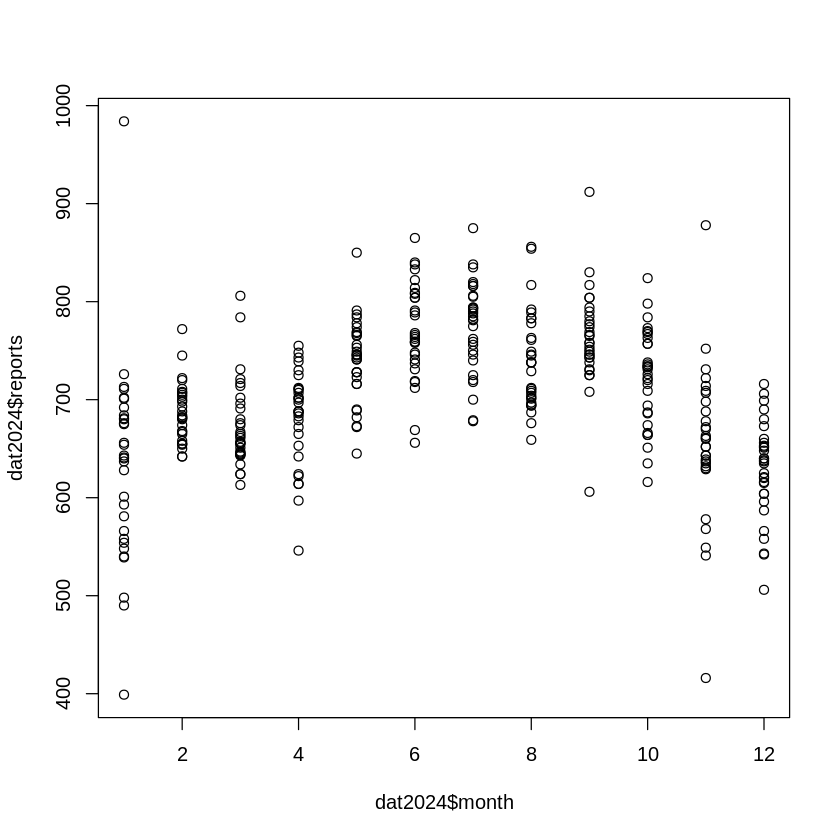

In [9]:
dat2001 <- subset(dat,year == 2001)
dat2002 <- subset(dat,year == 2002)
dat2003 <- subset(dat,year == 2003)
dat2004 <- subset(dat,year == 2004)
dat2005 <- subset(dat,year == 2005)
dat2006 <- subset(dat,year == 2006)
dat2007 <- subset(dat,year == 2007)
dat2008 <- subset(dat,year == 2008)
dat2009 <- subset(dat,year == 2009)
dat2010 <- subset(dat,year == 2010)
dat2011 <- subset(dat,year == 2011)
dat2012 <- subset(dat,year == 2012)
dat2013 <- subset(dat,year == 2013)
dat2014 <- subset(dat,year == 2014)
dat2015 <- subset(dat,year == 2015)
dat2016 <- subset(dat,year == 2016)
dat2017 <- subset(dat,year == 2017)
dat2018 <- subset(dat,year == 2018)
dat2019 <- subset(dat,year == 2019)
dat2020 <- subset(dat,year == 2020)
dat2021 <- subset(dat,year == 2021)
dat2022 <- subset(dat,year == 2022)
dat2023 <- subset(dat,year == 2023)
dat2024 <- subset(dat,year == 2024)
plot(dat2001$month, dat2001$reports)
plot(dat2002$month, dat2002$reports)
plot(dat2003$month, dat2003$reports)
plot(dat2004$month, dat2004$reports)
plot(dat2005$month, dat2005$reports)
plot(dat2006$month, dat2006$reports)
plot(dat2007$month, dat2007$reports)
plot(dat2008$month, dat2008$reports)
plot(dat2009$month, dat2009$reports)
plot(dat2010$month, dat2010$reports)
plot(dat2011$month, dat2011$reports)
plot(dat2012$month, dat2012$reports)
plot(dat2013$month, dat2013$reports)
plot(dat2014$month, dat2014$reports)
plot(dat2015$month, dat2015$reports)
plot(dat2016$month, dat2016$reports)
plot(dat2017$month, dat2017$reports)
plot(dat2018$month, dat2018$reports)
plot(dat2019$month, dat2019$reports)
plot(dat2020$month, dat2020$reports)
plot(dat2021$month, dat2021$reports)
plot(dat2022$month, dat2022$reports)
plot(dat2023$month, dat2023$reports)
plot(dat2024$month, dat2024$reports)

- For most years the lowest reports concentrate around March and April and the highest reports around September and October.
- 2020 diverges significantly from this pattern and has overall much lower reports likely due to COVID-19
- Years after 2020 slowly converge back to the seasonal pattern observed previously

## Weather
It is indicated in the brief that weather may play a significant role in the number of reports made. Each metric will be analyzed and discussed individually and any correlations will be noted.
### Temperature (temp)

[1] "Correlation of reports vs. temp: 0.23532"

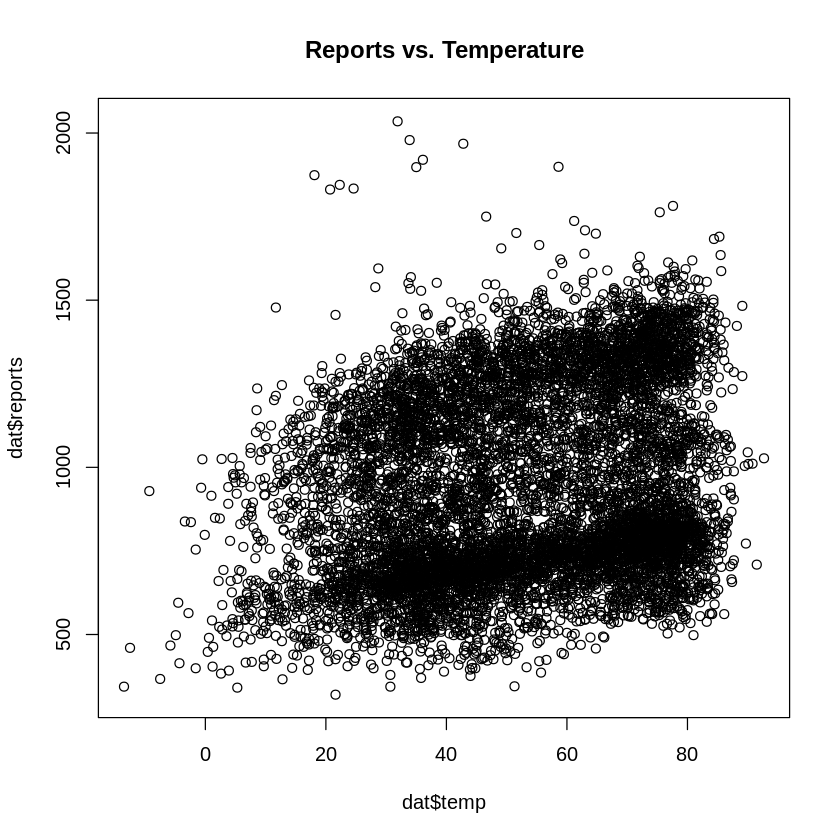

In [10]:
plot(dat$temp, dat$reports, main="Reports vs. Temperature")
sprintf("Correlation of reports vs. temp: %.5f",cor(dat$temp, dat$reports))

A correlation of 0.23 is fairly insignificant, however, we can clearly see the 2 groups in this plot as previously shown in the histogram of reports which may be skewing the data so we will generate correlations for every year.


In [11]:
sprintf("2001: %.5f",cor(dat2001$temp, dat2001$reports))
sprintf("2002: %.5f",cor(dat2002$temp, dat2002$reports))
sprintf("2003: %.5f",cor(dat2003$temp, dat2003$reports))
sprintf("2004: %.5f",cor(dat2004$temp, dat2004$reports))
sprintf("2005: %.5f",cor(dat2005$temp, dat2005$reports))
sprintf("2006: %.5f",cor(dat2006$temp, dat2006$reports))
sprintf("2007: %.5f",cor(dat2007$temp, dat2007$reports))
sprintf("2008: %.5f",cor(dat2008$temp, dat2008$reports))
sprintf("2009: %.5f",cor(dat2009$temp, dat2009$reports))
sprintf("2010: %.5f",cor(dat2010$temp, dat2010$reports))
sprintf("2011: %.5f",cor(dat2011$temp, dat2011$reports))
sprintf("2012: %.5f",cor(dat2012$temp, dat2012$reports))
sprintf("2013: %.5f",cor(dat2013$temp, dat2013$reports))
sprintf("2014: %.5f",cor(dat2014$temp, dat2014$reports))
sprintf("2015: %.5f",cor(dat2015$temp, dat2015$reports))
sprintf("2016: %.5f",cor(dat2016$temp, dat2016$reports))
sprintf("2017: %.5f",cor(dat2017$temp, dat2017$reports))
sprintf("2018: %.5f",cor(dat2018$temp, dat2018$reports))
sprintf("2019: %.5f",cor(dat2019$temp, dat2019$reports))
sprintf("2020: %.5f",cor(dat2020$temp, dat2020$reports))
sprintf("2021: %.5f",cor(dat2021$temp, dat2021$reports))
sprintf("2022: %.5f",cor(dat2022$temp, dat2022$reports))
sprintf("2023: %.5f",cor(dat2023$temp, dat2023$reports))
sprintf("2024: %.5f",cor(dat2024$temp, dat2024$reports))

[1] "2001: 0.66216"

[1] "2002: 0.68705"

[1] "2003: 0.66511"

[1] "2004: 0.72162"

[1] "2005: 0.70088"

[1] "2006: 0.58425"

[1] "2007: 0.75489"

[1] "2008: 0.74603"

[1] "2009: 0.60721"

[1] "2010: 0.65951"

[1] "2011: 0.69920"

[1] "2012: 0.68319"

[1] "2013: 0.64201"

[1] "2014: 0.72171"

[1] "2015: 0.66248"

[1] "2016: 0.69112"

[1] "2017: 0.59129"

[1] "2018: 0.71561"

[1] "2019: 0.70878"

[1] "2020: 0.19466"

[1] "2021: 0.63450"

[1] "2022: 0.67554"

[1] "2023: 0.61366"

[1] "2024: 0.71772"

This reveals that the correlation for a given year is much stronger, generally sitting between 0.5 and 0.7. The correlation for 2020 is much lower than any other year at 0.19, again, indicating this year is an outlier, likely due to COVID-19.

### Dew Point (dewp)

[1] "Correlation of reports vs. dewp: 0.22859"

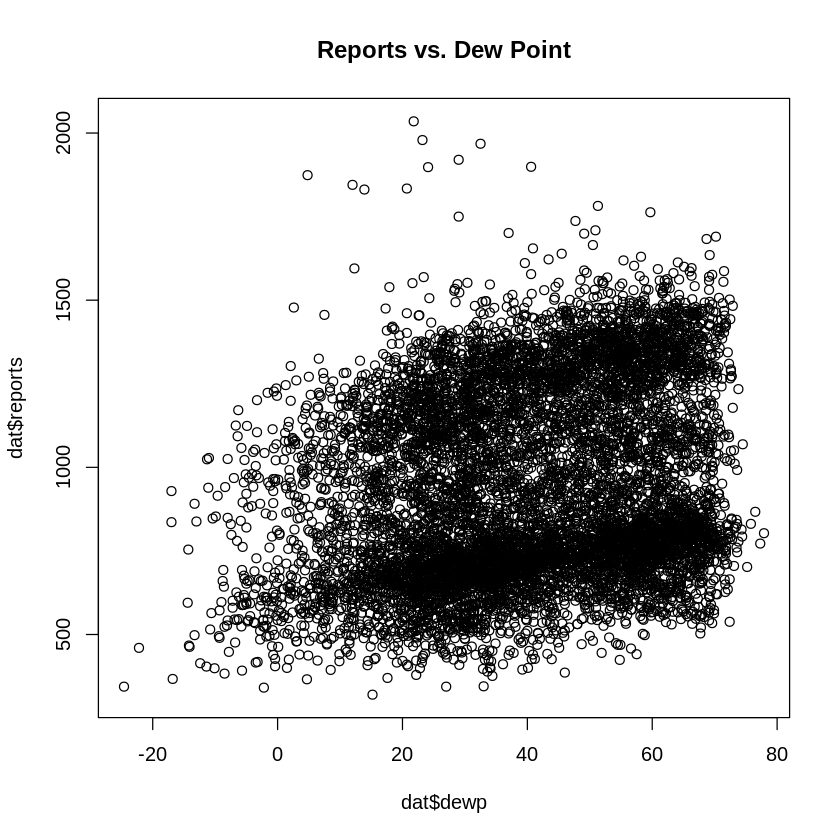

In [12]:
plot(dat$dewp, dat$reports, main="Reports vs. Dew Point")
sprintf("Correlation of reports vs. dewp: %.5f",cor(dat$dewp, dat$reports))

The same pattern is observed for Dew Point as was for Temperature, the correlations are calculated per year to confirm that a similar relationship exists.

In [13]:
sprintf("2001: %.5f",cor(dat2001$dewp, dat2001$reports))
sprintf("2002: %.5f",cor(dat2002$dewp, dat2002$reports))
sprintf("2003: %.5f",cor(dat2003$dewp, dat2003$reports))
sprintf("2004: %.5f",cor(dat2004$dewp, dat2004$reports))
sprintf("2005: %.5f",cor(dat2005$dewp, dat2005$reports))
sprintf("2006: %.5f",cor(dat2006$dewp, dat2006$reports))
sprintf("2007: %.5f",cor(dat2007$dewp, dat2007$reports))
sprintf("2008: %.5f",cor(dat2008$dewp, dat2008$reports))
sprintf("2009: %.5f",cor(dat2009$dewp, dat2009$reports))
sprintf("2010: %.5f",cor(dat2010$dewp, dat2010$reports))
sprintf("2011: %.5f",cor(dat2011$dewp, dat2011$reports))
sprintf("2012: %.5f",cor(dat2012$dewp, dat2012$reports))
sprintf("2013: %.5f",cor(dat2013$dewp, dat2013$reports))
sprintf("2014: %.5f",cor(dat2014$dewp, dat2014$reports))
sprintf("2015: %.5f",cor(dat2015$dewp, dat2015$reports))
sprintf("2016: %.5f",cor(dat2016$dewp, dat2016$reports))
sprintf("2017: %.5f",cor(dat2017$dewp, dat2017$reports))
sprintf("2018: %.5f",cor(dat2018$dewp, dat2018$reports))
sprintf("2019: %.5f",cor(dat2019$dewp, dat2019$reports))
sprintf("2020: %.5f",cor(dat2020$dewp, dat2020$reports))
sprintf("2021: %.5f",cor(dat2021$dewp, dat2021$reports))
sprintf("2022: %.5f",cor(dat2022$dewp, dat2022$reports))
sprintf("2023: %.5f",cor(dat2023$dewp, dat2023$reports))
sprintf("2024: %.5f",cor(dat2024$dewp, dat2024$reports))

[1] "2001: 0.60503"

[1] "2002: 0.64009"

[1] "2003: 0.61062"

[1] "2004: 0.68912"

[1] "2005: 0.64016"

[1] "2006: 0.53568"

[1] "2007: 0.68394"

[1] "2008: 0.69073"

[1] "2009: 0.53514"

[1] "2010: 0.58384"

[1] "2011: 0.64363"

[1] "2012: 0.62870"

[1] "2013: 0.59043"

[1] "2014: 0.68150"

[1] "2015: 0.60372"

[1] "2016: 0.66794"

[1] "2017: 0.55024"

[1] "2018: 0.66872"

[1] "2019: 0.67965"

[1] "2020: 0.16256"

[1] "2021: 0.58600"

[1] "2022: 0.64841"

[1] "2023: 0.57181"

[1] "2024: 0.63597"

As expected, similarly to temperature, Dew Point shows a moderate correlation with reports.

## Sea Level Pressure (slp)

[1] "Correlation of reports vs. slp: -0.09140"

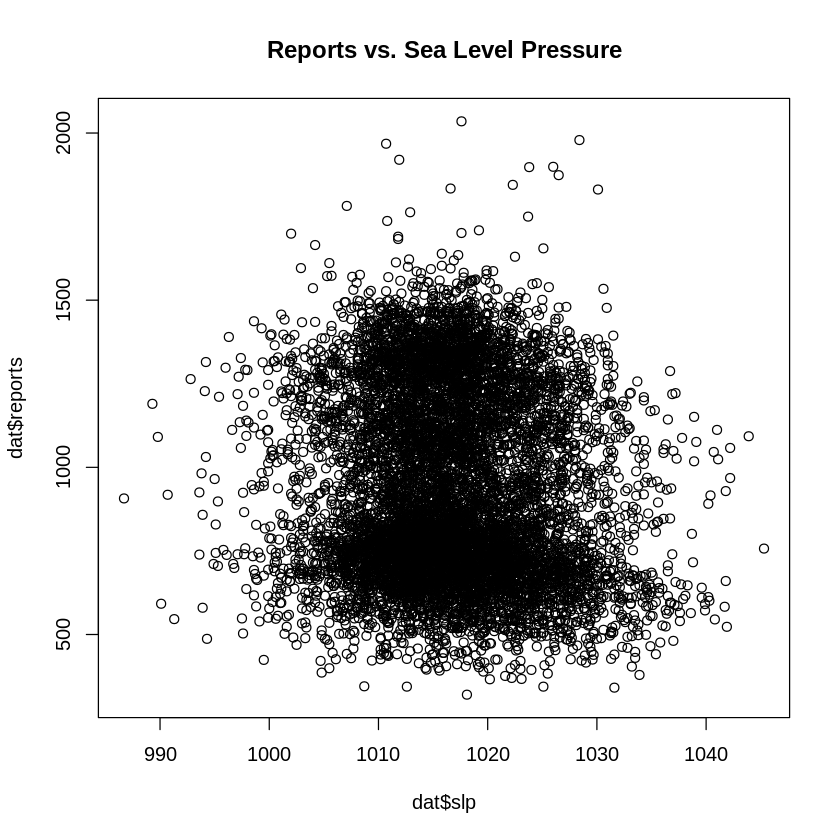

In [14]:
plot(dat$slp, dat$reports, main="Reports vs. Sea Level Pressure")
sprintf("Correlation of reports vs. slp: %.5f",cor(dat$slp, dat$reports, use = "complete.obs"))

Sea Level Pressure shows negligible correlation with reports.

## Station Pressure (stp)

[1] "Correlation of reports vs. stp: -0.08907"

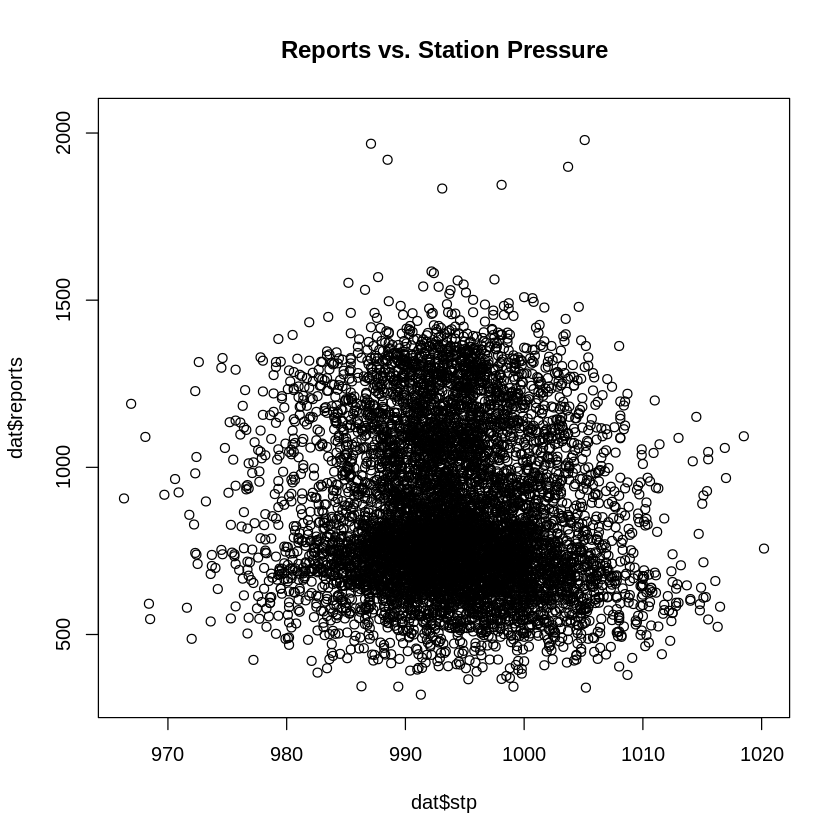

In [15]:
plot(dat$stp, dat$reports, main="Reports vs. Station Pressure")
sprintf("Correlation of reports vs. stp: %.5f",cor(dat$stp, dat$reports, use = "complete.obs"))

Station Pressure shows a similar plot to Sea Level Pressure and no discernible correlation.

## Visibilty (visib)

[1] "Correlation of reports vs. visib: 0.02581"

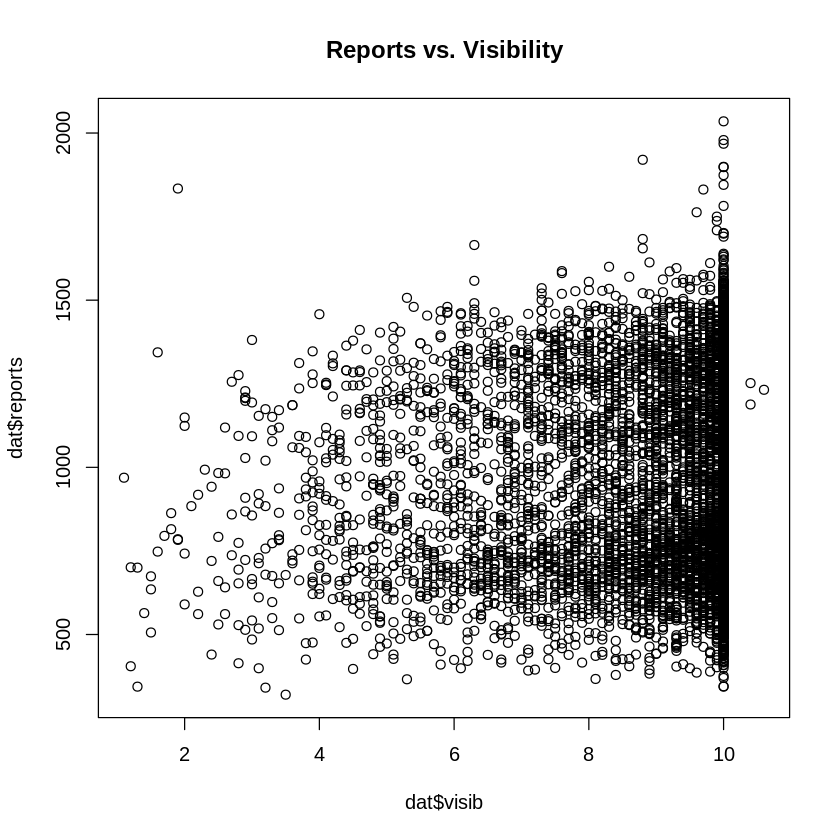

In [16]:
plot(dat$visib, dat$reports, main="Reports vs. Visibility")
sprintf("Correlation of reports vs. visib: %.5f",cor(dat$visib, dat$reports, use = "complete.obs"))

Visibility shows negligible correlation.

Upon further inspection there is very low to negligible correlation.

### Wind Speed (wdsp)

[1] "Correlation of reports vs. wdsp: -0.07136"

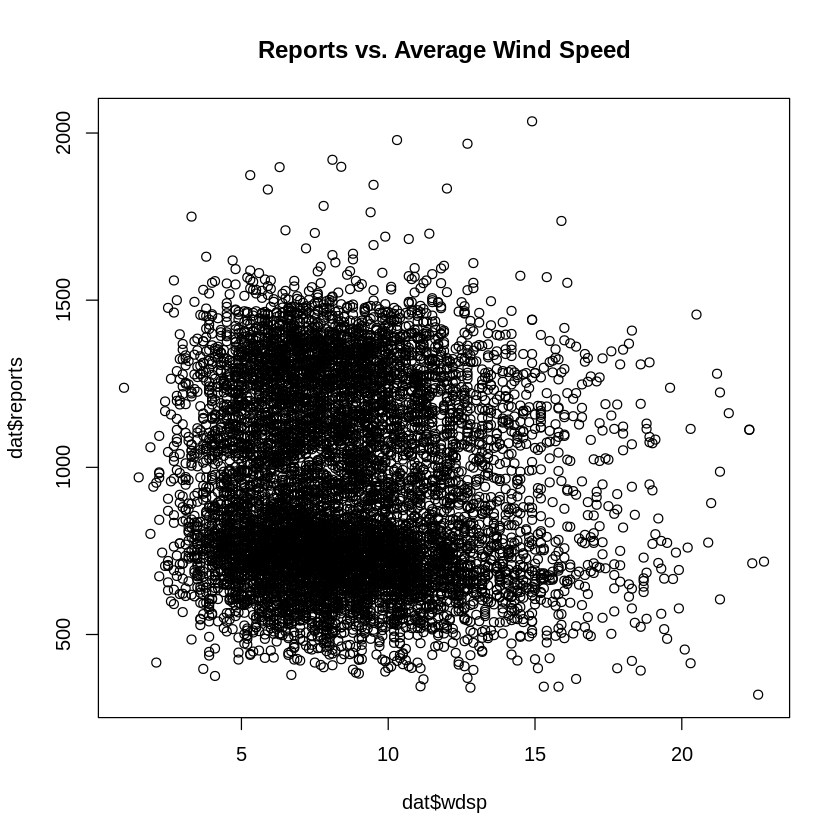

In [17]:
plot(dat$wdsp, dat$reports, main="Reports vs. Average Wind Speed")
sprintf("Correlation of reports vs. wdsp: %.5f",cor(dat$wdsp, dat$reports, use = "complete.obs"))

Wind Speed has negligible correlation with crimes reported.

### Maximum Sustained Wind Speed (mxpsd)

[1] "Correlation of reports vs. mxpsd: -0.05531"

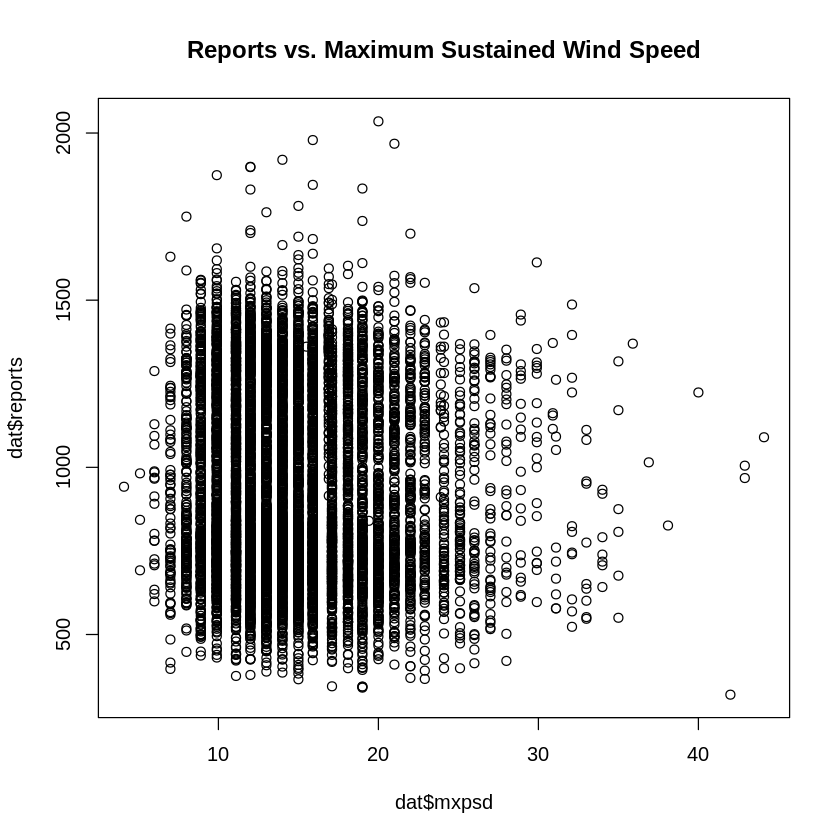

In [18]:
plot(dat$mxpsd, dat$reports, main="Reports vs. Maximum Sustained Wind Speed")
sprintf("Correlation of reports vs. mxpsd: %.5f",cor(dat$mxpsd, dat$reports, use = "complete.obs"))

Maximum Sustained Wind Speed has negligible correlation with crimes reported.

### Maximum Wind Gust Reported (gust)

[1] "Correlation of reports vs. gust: -0.13798"

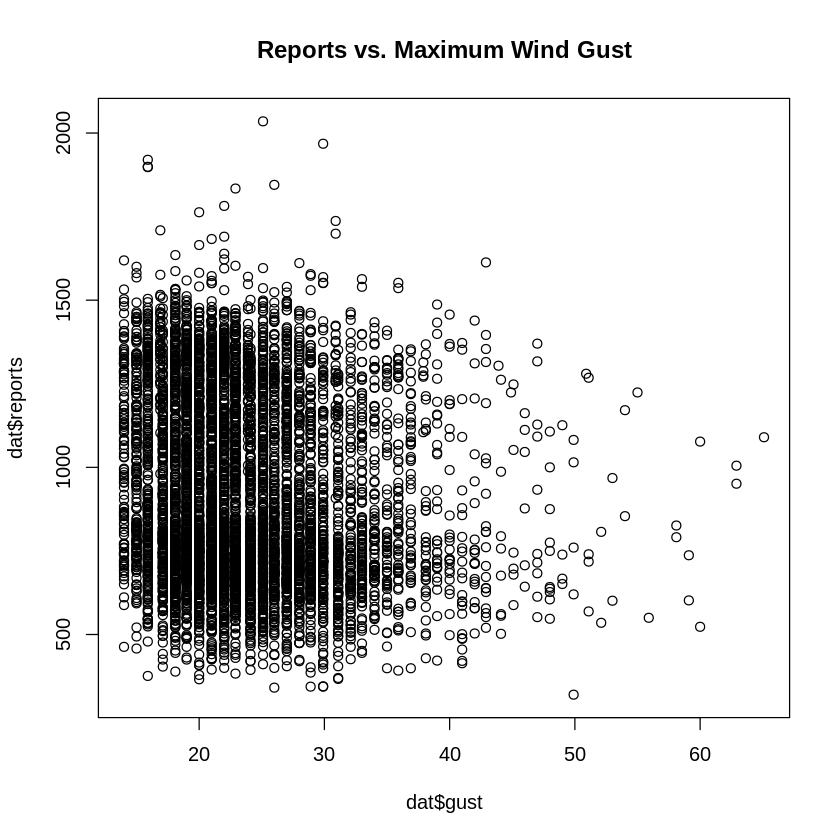

In [19]:
plot(dat$gust, dat$reports, main="Reports vs. Maximum Wind Gust")
sprintf("Correlation of reports vs. gust: %.5f",cor(dat$gust, dat$reports, use = "complete.obs"))

Maximum Wind Gust has negligible correlation with crimes reported.

### Maximum Temperature Reported (max)

[1] "Correlation of reports vs. max: 0.22716"

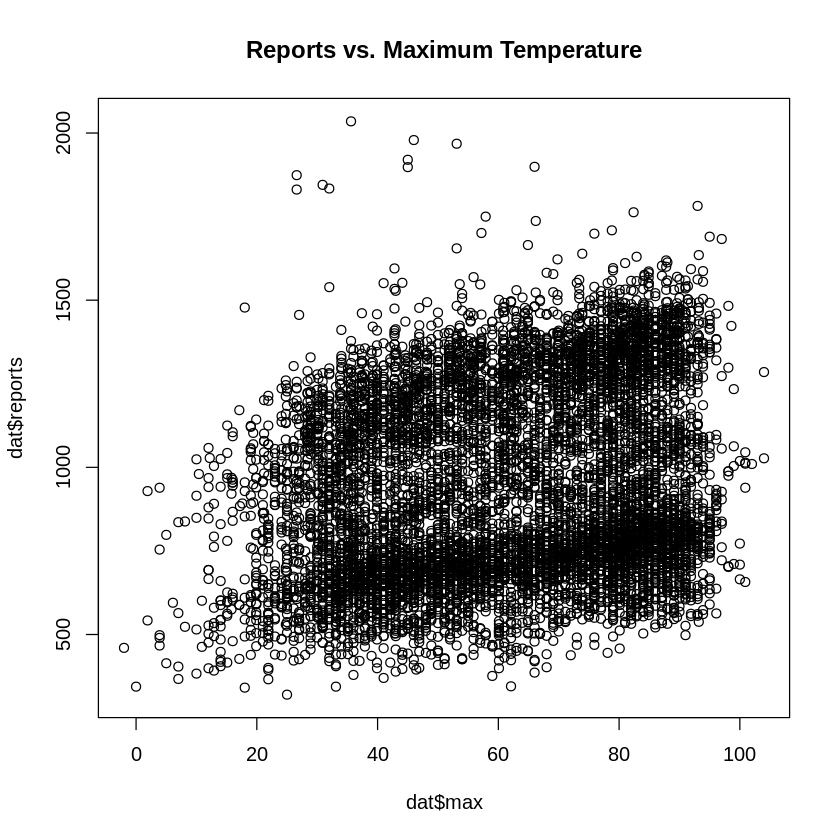

In [20]:
plot(dat$max, dat$reports, main="Reports vs. Maximum Temperature")
sprintf("Correlation of reports vs. max: %.5f",cor(dat$max, dat$reports, use = "complete.obs"))

There appears to be a good correlation, to confirm correlations per year are calculated.

In [21]:
sprintf("2001: %.5f",cor(dat2001$max, dat2001$reports))
sprintf("2002: %.5f",cor(dat2002$max, dat2002$reports))
sprintf("2003: %.5f",cor(dat2003$max, dat2003$reports))
sprintf("2004: %.5f",cor(dat2004$max, dat2004$reports))
sprintf("2005: %.5f",cor(dat2005$max, dat2005$reports))
sprintf("2006: %.5f",cor(dat2006$max, dat2006$reports))
sprintf("2007: %.5f",cor(dat2007$max, dat2007$reports))
sprintf("2008: %.5f",cor(dat2008$max, dat2008$reports, use = "complete.obs"))
sprintf("2009: %.5f",cor(dat2009$max, dat2009$reports))
sprintf("2010: %.5f",cor(dat2010$max, dat2010$reports))
sprintf("2011: %.5f",cor(dat2011$max, dat2011$reports))
sprintf("2012: %.5f",cor(dat2012$max, dat2012$reports))
sprintf("2013: %.5f",cor(dat2013$max, dat2013$reports))
sprintf("2014: %.5f",cor(dat2014$max, dat2014$reports))
sprintf("2015: %.5f",cor(dat2015$max, dat2015$reports))
sprintf("2016: %.5f",cor(dat2016$max, dat2016$reports, use = "complete.obs"))
sprintf("2017: %.5f",cor(dat2017$max, dat2017$reports))
sprintf("2018: %.5f",cor(dat2018$max, dat2018$reports))
sprintf("2019: %.5f",cor(dat2019$max, dat2019$reports))
sprintf("2020: %.5f",cor(dat2020$max, dat2020$reports))
sprintf("2021: %.5f",cor(dat2021$max, dat2021$reports))
sprintf("2022: %.5f",cor(dat2022$max, dat2022$reports))
sprintf("2023: %.5f",cor(dat2023$max, dat2023$reports))
sprintf("2024: %.5f",cor(dat2024$max, dat2024$reports))

[1] "2001: 0.65795"

[1] "2002: 0.68666"

[1] "2003: 0.65478"

[1] "2004: 0.72194"

[1] "2005: 0.70841"

[1] "2006: 0.57568"

[1] "2007: 0.75757"

[1] "2008: 0.74041"

[1] "2009: 0.63064"

[1] "2010: 0.67029"

[1] "2011: 0.71707"

[1] "2012: 0.68016"

[1] "2013: 0.62082"

[1] "2014: 0.71553"

[1] "2015: 0.65540"

[1] "2016: 0.67714"

[1] "2017: 0.58885"

[1] "2018: 0.71414"

[1] "2019: 0.70409"

[1] "2020: 0.17201"

[1] "2021: 0.61628"

[1] "2022: 0.66015"

[1] "2023: 0.60491"

[1] "2024: 0.71192"

As expected Maximum Temperature has a moderate to high correlation with crimes reported excluding 2020.

### Minimum Recorded Temperature (min)

[1] "Correlation of reports vs. min: 0.23414"

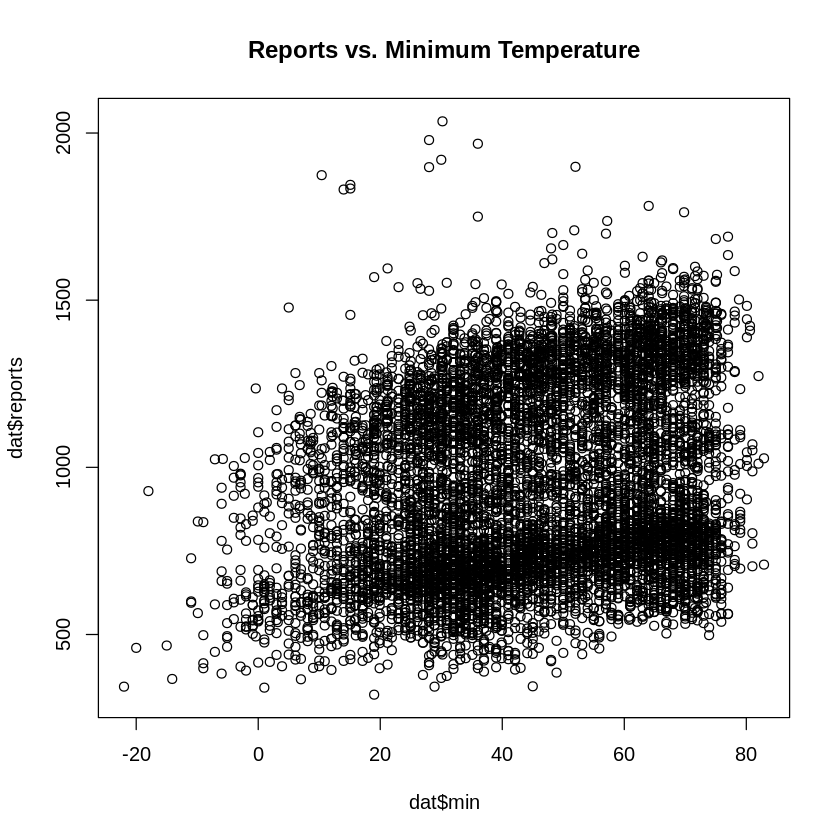

In [22]:
plot(dat$min, dat$reports, main="Reports vs. Minimum Temperature")
sprintf("Correlation of reports vs. min: %.5f",cor(dat$min, dat$reports, use = "complete.obs"))

There appears to be a good correlation, to confirm correlations per year are calculated.

In [23]:
sprintf("2001: %.5f",cor(dat2001$max, dat2001$reports))
sprintf("2002: %.5f",cor(dat2002$max, dat2002$reports))
sprintf("2003: %.5f",cor(dat2003$max, dat2003$reports))
sprintf("2004: %.5f",cor(dat2004$max, dat2004$reports))
sprintf("2005: %.5f",cor(dat2005$max, dat2005$reports))
sprintf("2006: %.5f",cor(dat2006$max, dat2006$reports))
sprintf("2007: %.5f",cor(dat2007$max, dat2007$reports))
sprintf("2008: %.5f",cor(dat2008$max, dat2008$reports, use = "complete.obs"))
sprintf("2009: %.5f",cor(dat2009$max, dat2009$reports))
sprintf("2010: %.5f",cor(dat2010$max, dat2010$reports))
sprintf("2011: %.5f",cor(dat2011$max, dat2011$reports))
sprintf("2012: %.5f",cor(dat2012$max, dat2012$reports))
sprintf("2013: %.5f",cor(dat2013$max, dat2013$reports))
sprintf("2014: %.5f",cor(dat2014$max, dat2014$reports))
sprintf("2015: %.5f",cor(dat2015$max, dat2015$reports))
sprintf("2016: %.5f",cor(dat2016$max, dat2016$reports, use = "complete.obs"))
sprintf("2017: %.5f",cor(dat2017$max, dat2017$reports))
sprintf("2018: %.5f",cor(dat2018$max, dat2018$reports))
sprintf("2019: %.5f",cor(dat2019$max, dat2019$reports))
sprintf("2020: %.5f",cor(dat2020$max, dat2020$reports))
sprintf("2021: %.5f",cor(dat2021$max, dat2021$reports))
sprintf("2022: %.5f",cor(dat2022$max, dat2022$reports))
sprintf("2023: %.5f",cor(dat2023$max, dat2023$reports))
sprintf("2024: %.5f",cor(dat2024$max, dat2024$reports))

[1] "2001: 0.65795"

[1] "2002: 0.68666"

[1] "2003: 0.65478"

[1] "2004: 0.72194"

[1] "2005: 0.70841"

[1] "2006: 0.57568"

[1] "2007: 0.75757"

[1] "2008: 0.74041"

[1] "2009: 0.63064"

[1] "2010: 0.67029"

[1] "2011: 0.71707"

[1] "2012: 0.68016"

[1] "2013: 0.62082"

[1] "2014: 0.71553"

[1] "2015: 0.65540"

[1] "2016: 0.67714"

[1] "2017: 0.58885"

[1] "2018: 0.71414"

[1] "2019: 0.70409"

[1] "2020: 0.17201"

[1] "2021: 0.61628"

[1] "2022: 0.66015"

[1] "2023: 0.60491"

[1] "2024: 0.71192"

Minimum Temperature has moderate to high correlation with crimes reported, this is expected as max, min and temp have high correlation with one another:

In [24]:
cor(dat$temp, dat$max, use = "complete.obs")
cor(dat$temp, dat$min, use = "complete.obs")
cor(dat$max, dat$min, use = "complete.obs")

[1] 0.9820106

[1] 0.985799

[1] 0.949258

### Total Precipitation (prcp)

[1] "Correlation of reports vs. prcp: -0.00964"

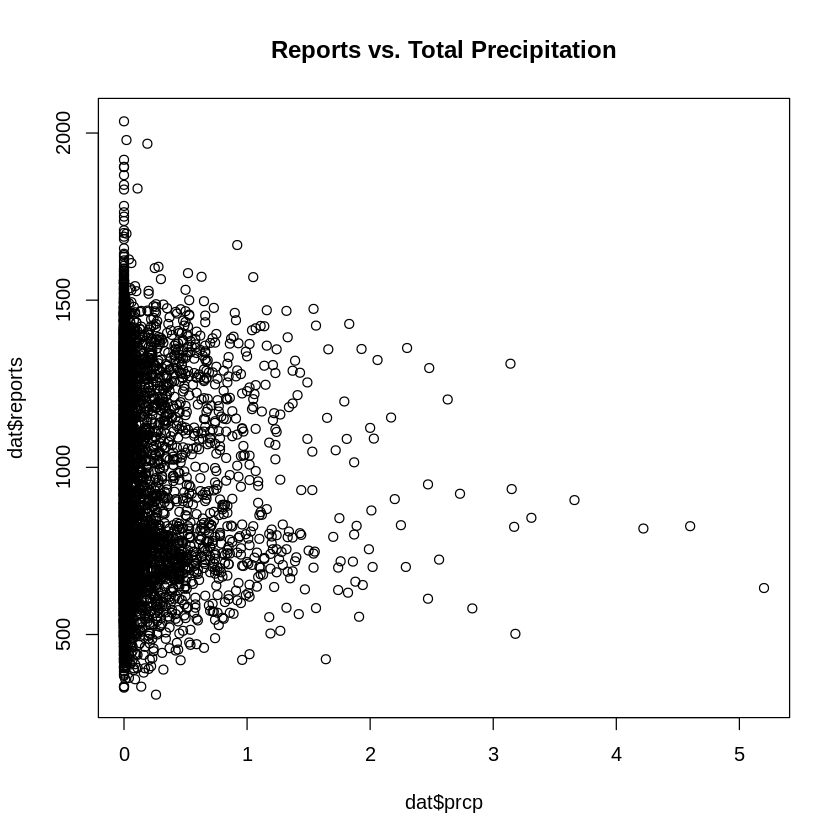

In [25]:
plot(dat$prcp, dat$reports, main="Reports vs. Total Precipitation")
sprintf("Correlation of reports vs. prcp: %.5f",cor(dat$prcp, dat$reports, use = "complete.obs"))

Total precipitation has negligible correlation with crimes reported.

### Snow Depth (sndp)

[1] "Correlation of reports vs. sndp: -0.13088"

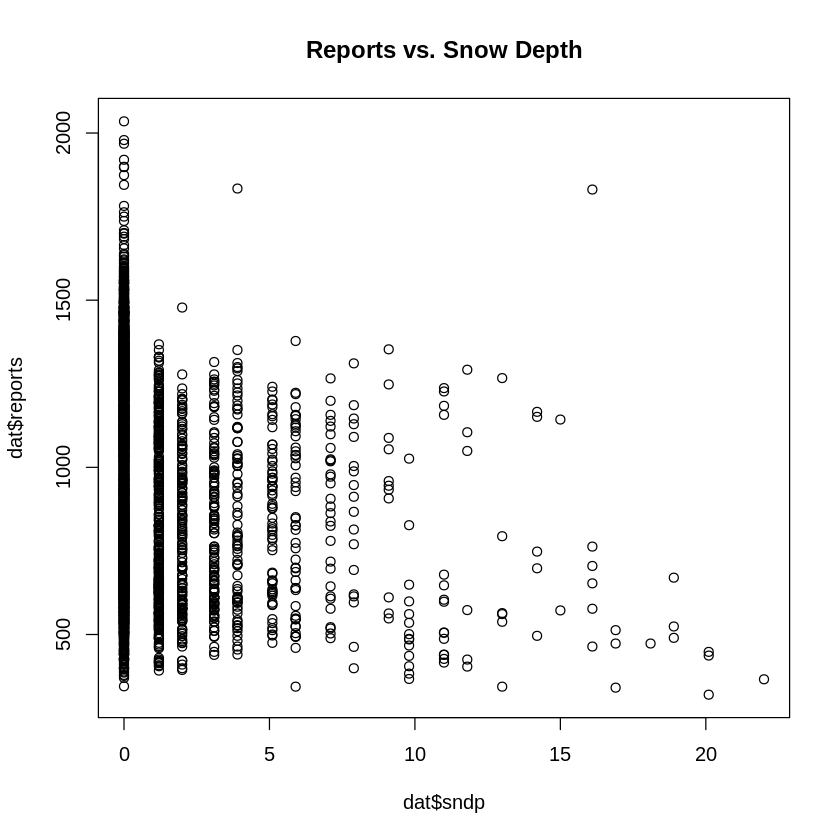

In [26]:
plot(dat$sndp, dat$reports, main="Reports vs. Snow Depth")
sprintf("Correlation of reports vs. sndp: %.5f",cor(dat$sndp, dat$reports, use = "complete.obs"))

It is difficult to decipher if a relationship exists from the plot so correlations are generated for each year.

In [27]:
sprintf("2001: %.5f",cor(dat2001$sndp, dat2001$reports))
sprintf("2002: %.5f",cor(dat2002$sndp, dat2002$reports))
sprintf("2003: %.5f",cor(dat2003$sndp, dat2003$reports))
sprintf("2004: %.5f",cor(dat2004$sndp, dat2004$reports))
sprintf("2005: %.5f",cor(dat2005$sndp, dat2005$reports))
sprintf("2006: %.5f",cor(dat2006$sndp, dat2006$reports))
sprintf("2007: %.5f",cor(dat2007$sndp, dat2007$reports))
sprintf("2008: %.5f",cor(dat2008$sndp, dat2008$reports, use = "complete.obs"))
sprintf("2009: %.5f",cor(dat2009$sndp, dat2009$reports))
sprintf("2010: %.5f",cor(dat2010$sndp, dat2010$reports))
sprintf("2011: %.5f",cor(dat2011$sndp, dat2011$reports))
sprintf("2012: %.5f",cor(dat2012$sndp, dat2012$reports))
sprintf("2013: %.5f",cor(dat2013$sndp, dat2013$reports))
sprintf("2014: %.5f",cor(dat2014$sndp, dat2014$reports))
sprintf("2015: %.5f",cor(dat2015$sndp, dat2015$reports))
sprintf("2016: %.5f",cor(dat2016$sndp, dat2016$reports, use = "complete.obs"))
sprintf("2017: %.5f",cor(dat2017$sndp, dat2017$reports))
sprintf("2018: %.5f",cor(dat2018$sndp, dat2018$reports))
sprintf("2019: %.5f",cor(dat2019$sndp, dat2019$reports))
sprintf("2020: %.5f",cor(dat2020$sndp, dat2020$reports))
sprintf("2021: %.5f",cor(dat2021$sndp, dat2021$reports))
sprintf("2022: %.5f",cor(dat2022$sndp, dat2022$reports))
sprintf("2023: %.5f",cor(dat2023$sndp, dat2023$reports))
sprintf("2024: %.5f",cor(dat2024$sndp, dat2024$reports))

[1] "2001: -0.17476"

[1] "2002: -0.43913"

[1] "2003: -0.35203"

[1] "2004: -0.40592"

[1] "2005: -0.49663"

[1] "2006: -0.36038"

[1] "2007: -0.44470"

[1] "2008: -0.49267"

[1] "2009: -0.49209"

[1] "2010: -0.59857"

[1] "2011: -0.43472"

[1] "2012: -0.28664"

[1] "2013: -0.31554"

[1] "2014: -0.47902"

[1] "2015: -0.46094"

[1] "2016: -0.40353"

[1] "2017: -0.40061"

[1] "2018: -0.35050"

[1] "2019: -0.46125"

[1] "2020: 0.01586"

[1] "2021: -0.46774"

[1] "2022: -0.51309"

[1] "2023: -0.28781"

[1] "2024: -0.38096"

For most years Snow Depth has a low correlation with crimes reported, however, some years show a moderate or negligible correlation. It may be that years with different total snowfall see different correlations.

# Data Cleaning

In [28]:
summary(dat)

      date              dayOfWeek   dayOfMonth        month       
 Min.   :2001-01-01   Min.   :1   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:2007-01-01   1st Qu.:2   1st Qu.: 8.00   1st Qu.: 4.000  
 Median :2012-12-31   Median :4   Median :16.00   Median : 7.000  
 Mean   :2012-12-31   Mean   :4   Mean   :15.73   Mean   : 6.523  
 3rd Qu.:2018-12-31   3rd Qu.:6   3rd Qu.:23.00   3rd Qu.:10.000  
 Max.   :2024-12-31   Max.   :7   Max.   :31.00   Max.   :12.000  
                                                                  
      year         reports            temp             dewp       
 Min.   :2001   Min.   : 320.0   Min.   :-13.50   Min.   :-24.60  
 1st Qu.:2007   1st Qu.: 711.0   1st Qu.: 36.90   1st Qu.: 26.60  
 Median :2012   Median : 868.0   Median : 53.30   Median : 40.50  
 Mean   :2013   Mean   : 939.7   Mean   : 52.64   Mean   : 40.16  
 3rd Qu.:2019   3rd Qu.:1185.0   3rd Qu.: 70.50   3rd Qu.: 55.80  
 Max.   :2024   Max.   :2035.0   Max.   : 92.70   Max.   : 77.

## Station Pressure (stp) and Gust Speed (gust)
These attributes will be removed from the dataset due to the large number of missing records.

In [29]:
dat <- subset(dat, select=-c(stp,gust))
summary(dat)

      date              dayOfWeek   dayOfMonth        month       
 Min.   :2001-01-01   Min.   :1   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:2007-01-01   1st Qu.:2   1st Qu.: 8.00   1st Qu.: 4.000  
 Median :2012-12-31   Median :4   Median :16.00   Median : 7.000  
 Mean   :2012-12-31   Mean   :4   Mean   :15.73   Mean   : 6.523  
 3rd Qu.:2018-12-31   3rd Qu.:6   3rd Qu.:23.00   3rd Qu.:10.000  
 Max.   :2024-12-31   Max.   :7   Max.   :31.00   Max.   :12.000  
                                                                  
      year         reports            temp             dewp       
 Min.   :2001   Min.   : 320.0   Min.   :-13.50   Min.   :-24.60  
 1st Qu.:2007   1st Qu.: 711.0   1st Qu.: 36.90   1st Qu.: 26.60  
 Median :2012   Median : 868.0   Median : 53.30   Median : 40.50  
 Mean   :2013   Mean   : 939.7   Mean   : 52.64   Mean   : 40.16  
 3rd Qu.:2019   3rd Qu.:1185.0   3rd Qu.: 70.50   3rd Qu.: 55.80  
 Max.   :2024   Max.   :2035.0   Max.   : 92.70   Max.   : 77.

## Maximum Temperature (max) and Sea Level Pressure (slp)
These attributes both have missing data for 2 dates each. the 4 affected records will be removed from the dataset. This will have a negligible affect on the models generated as it is less than 0.1% of the dataset.

In [30]:
dat <- subset(dat, !(is.na(max) | is.na(slp)))
summary(dat)

      date              dayOfWeek       dayOfMonth        month       
 Min.   :2001-01-01   Min.   :1.000   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:2007-01-02   1st Qu.:2.000   1st Qu.: 8.00   1st Qu.: 4.000  
 Median :2013-01-01   Median :4.000   Median :16.00   Median : 7.000  
 Mean   :2013-01-01   Mean   :4.001   Mean   :15.73   Mean   : 6.523  
 3rd Qu.:2019-01-01   3rd Qu.:6.000   3rd Qu.:23.00   3rd Qu.:10.000  
 Max.   :2024-12-31   Max.   :7.000   Max.   :31.00   Max.   :12.000  
                                                                      
      year         reports            temp             dewp       
 Min.   :2001   Min.   : 320.0   Min.   :-13.50   Min.   :-24.60  
 1st Qu.:2007   1st Qu.: 711.0   1st Qu.: 36.90   1st Qu.: 26.60  
 Median :2013   Median : 868.0   Median : 53.30   Median : 40.50  
 Mean   :2013   Mean   : 939.7   Mean   : 52.65   Mean   : 40.16  
 3rd Qu.:2019   3rd Qu.:1185.0   3rd Qu.: 70.50   3rd Qu.: 55.88  
 Max.   :2024   Max.   :2035.0

## Total Precipitation (prcp)
Since there are more records it would be better to fill in reasonable guesses if possible. First the data is viewed.

In [31]:
subset(dat, is.na(prcp))

,date,dayOfWeek,dayOfMonth,month,year,reports,temp,dewp,slp,visib,wdsp,mxpsd,max,min,prcp,sndp
,<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,2001-02-03,7,3,2,2001,1185,18.0,11.0,1023.9,9.4,9.7,13.0,30.2,10.4,NA,0.0
136,2001-05-16,4,16,5,2001,1382,78.1,64.3,1001.9,9.4,8.6,15.0,89.6,69.8,NA,0.0
142,2001-05-22,3,22,5,2001,1277,56.2,42.9,1004.6,10.0,12.2,20.0,62.6,48.2,NA,0.0
143,2001-05-23,4,23,5,2001,1235,53.1,43.7,1005.3,10.0,8.8,16.9,60.8,46.4,NA,0.0
145,2001-05-25,6,25,5,2001,1351,52.6,46.0,1008.9,9.0,5.5,8.9,60.1,46.9,NA,0.0
146,2001-05-26,7,26,5,2001,1161,51.9,47.6,1006.7,7.5,7.4,18.1,57.9,45.0,NA,0.0
147,2001-05-27,1,27,5,2001,1153,53.2,48.8,1005.0,8.3,10.9,18.1,59.0,50.0,NA,0.0
148,2001-05-28,2,28,5,2001,1325,58.3,51.5,1011.8,8.8,4.2,8.0,66.2,51.8,NA,0.0
370,2002-01-05,7,5,1,2002,1103,33.7,22.6,1015.2,9.2,9.3,13.0,37.4,28.4,NA,0.0


In [32]:
dat[33:35,]
dat[135:137,]
dat[141:149,]
dat[369:371,]
dat[471:478,]

,date,dayOfWeek,dayOfMonth,month,year,reports,temp,dewp,slp,visib,wdsp,mxpsd,max,min,prcp,sndp
,<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
33,2001-02-02,6,2,2,2001,1236,8.6,-0.2,1026.2,9.1,11.8,16.9,26.6,-0.4,0.00,0
34,2001-02-03,7,3,2,2001,1185,18.0,11.0,1023.9,9.4,9.7,13.0,30.2,10.4,NA,0
35,2001-02-04,1,4,2,2001,1149,33.8,28.9,1015.1,7.9,6.5,12.0,36.0,28.9,0.01,0


,date,dayOfWeek,dayOfMonth,month,year,reports,temp,dewp,slp,visib,wdsp,mxpsd,max,min,prcp,sndp
,<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
135,2001-05-15,3,15,5,2001,1420,73.5,58.9,1008.2,10.0,10.0,15.9,91.0,59.0,0.00,0
136,2001-05-16,4,16,5,2001,1382,78.1,64.3,1001.9,9.4,8.6,15.0,89.6,69.8,NA,0
137,2001-05-17,5,17,5,2001,1407,73.2,61.3,1005.7,7.6,5.4,13.0,87.1,66.0,0.11,0


,date,dayOfWeek,dayOfMonth,month,year,reports,temp,dewp,slp,visib,wdsp,mxpsd,max,min,prcp,sndp
,<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
141,2001-05-21,2,21,5,2001,1437,68.2,59.5,998.6,7.8,11.6,21.0,75.0,62.1,0,0
142,2001-05-22,3,22,5,2001,1277,56.2,42.9,1004.6,10.0,12.2,20.0,62.6,48.2,NA,0
143,2001-05-23,4,23,5,2001,1235,53.1,43.7,1005.3,10.0,8.8,16.9,60.8,46.4,NA,0
144,2001-05-24,5,24,5,2001,1312,52.6,45.7,1006.3,9.2,6.2,15.9,60.8,46.4,0,0
145,2001-05-25,6,25,5,2001,1351,52.6,46.0,1008.9,9.0,5.5,8.9,60.1,46.9,NA,0
146,2001-05-26,7,26,5,2001,1161,51.9,47.6,1006.7,7.5,7.4,18.1,57.9,45.0,NA,0
147,2001-05-27,1,27,5,2001,1153,53.2,48.8,1005.0,8.3,10.9,18.1,59.0,50.0,NA,0
148,2001-05-28,2,28,5,2001,1325,58.3,51.5,1011.8,8.8,4.2,8.0,66.2,51.8,NA,0
149,2001-05-29,3,29,5,2001,1410,58.6,49.2,1017.1,8.7,8.9,15.9,64.9,51.1,0,0


,date,dayOfWeek,dayOfMonth,month,year,reports,temp,dewp,slp,visib,wdsp,mxpsd,max,min,prcp,sndp
,<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
369,2002-01-04,6,4,1,2002,1150,26.6,15.3,1020.2,10.0,10.6,16.9,39.2,19.4,0.00,0
370,2002-01-05,7,5,1,2002,1103,33.7,22.6,1015.2,9.2,9.3,13.0,37.4,28.4,NA,0
371,2002-01-06,1,6,1,2002,1038,33.8,27.6,1012.5,6.9,9.7,15.9,37.9,30.9,0.02,0


,date,dayOfWeek,dayOfMonth,month,year,reports,temp,dewp,slp,visib,wdsp,mxpsd,max,min,prcp,sndp
,<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
471,2002-04-16,3,16,4,2002,1328,77.3,60.2,1010.9,10.0,15.7,27.0,88.0,66.9,0,0
472,2002-04-17,4,17,4,2002,1347,75.8,60.6,1013.2,10.0,11.3,22.0,84.2,66.2,NA,0
473,2002-04-18,5,18,4,2002,1357,76.4,59.1,1012.9,9.8,11.2,22.0,89.6,68.0,0,0
474,2002-04-19,6,19,4,2002,1364,65.5,51.7,1012.8,10.0,12.7,19.0,82.4,51.8,NA,0
475,2002-04-20,7,20,4,2002,1323,45.0,34.0,1019.8,9.0,15.8,22.9,52.0,42.1,NA,0
478,2002-04-23,3,23,4,2002,1321,45.1,33.1,1020.4,10.0,6.4,13.0,60.8,35.6,0,0
479,2002-04-24,4,24,4,2002,1297,59.2,44.0,1013.9,9.6,12.0,29.9,73.9,50.0,NA,0
480,2002-04-25,5,25,4,2002,1326,47.7,28.3,1018.8,10.0,17.3,28.0,55.4,37.4,0,0


The records appear to be surrounded by 0's and so an educated guess of 0mm will be used for these records. These represent 0.32% of the dataset so will not have a significant impact on the models produced.

In [33]:
dat$prcp[is.na(dat$prcp)] <- 0
summary(dat)

      date              dayOfWeek       dayOfMonth        month       
 Min.   :2001-01-01   Min.   :1.000   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:2007-01-02   1st Qu.:2.000   1st Qu.: 8.00   1st Qu.: 4.000  
 Median :2013-01-01   Median :4.000   Median :16.00   Median : 7.000  
 Mean   :2013-01-01   Mean   :4.001   Mean   :15.73   Mean   : 6.523  
 3rd Qu.:2019-01-01   3rd Qu.:6.000   3rd Qu.:23.00   3rd Qu.:10.000  
 Max.   :2024-12-31   Max.   :7.000   Max.   :31.00   Max.   :12.000  
      year         reports            temp             dewp       
 Min.   :2001   Min.   : 320.0   Min.   :-13.50   Min.   :-24.60  
 1st Qu.:2007   1st Qu.: 711.0   1st Qu.: 36.90   1st Qu.: 26.60  
 Median :2013   Median : 868.0   Median : 53.30   Median : 40.50  
 Mean   :2013   Mean   : 939.7   Mean   : 52.65   Mean   : 40.16  
 3rd Qu.:2019   3rd Qu.:1185.0   3rd Qu.: 70.50   3rd Qu.: 55.88  
 Max.   :2024   Max.   :2035.0   Max.   : 92.70   Max.   : 77.90  
      slp             visib       

# Conclusion
Using R's built in Linear Model fitting algorithm can give an indication of how significant each attribute is likely to be when the linear regressor is created with TensorFlow. Date is excluded as it is a non numeric and contains no more information than the combination of year and month.

In [34]:
m <- lm(reports ~ . -date, data = dat)
summary(m)


Call:
lm(formula = reports ~ . - date, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-510.63  -75.30   -6.27   66.76 1236.36 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 74018.3684   411.9475  179.679  < 2e-16 ***
dayOfWeek       9.3825     0.5879   15.958  < 2e-16 ***
dayOfMonth     -1.4919     0.1339  -11.143  < 2e-16 ***
month          -2.8283     0.3650   -7.750 1.02e-14 ***
year          -36.1157     0.1708 -211.486  < 2e-16 ***
temp            1.7439     0.7690    2.268  0.02337 *  
dewp           -1.7488     0.3201   -5.463 4.81e-08 ***
slp            -0.5675     0.2163   -2.623  0.00873 ** 
visib           5.1882     1.0128    5.123 3.08e-07 ***
wdsp           -1.6483     0.6710   -2.457  0.01404 *  
mxpsd          -1.2643     0.4421   -2.859  0.00425 ** 
max             0.1467     0.3810    0.385  0.70024    
min             3.2221     0.4972    6.480 9.67e-11 ***
prcp           -3.9368     4.7361   -0.831  0.40586    

- Year, month, dew point and, snow depth are very significant as expected.
- Precipitation is insignificant as expected.
- Average and max temperature are not as significant as expected, this could be because they correlates strongly with minimum temperature and so contain little additional information.
- The day of the week and day of the month are much more significant than expected.
- A number of other attributes are more significant than expected (slp, visib, wdsp, mxpsd).
- While some relationships are generally linear such as temperature and year others are more complicated such as month.

Finally the dataset is outputted to a csv so that it can be loaded into a python kernal for generating linear regression and deep neural network models.

In [35]:
row.names(dat) <- 1:nrow(dat)
dat$date <- NULL
write.csv(dat,"2_cleaned_dataset.csv")